# Predicción de fraude

*Por: Valentina Miranda Garcés*

In [1]:
import pandas as pd

df = pd.read_csv('TechnicalInterviewFraudPrevention.csv')

In [2]:
#df_streamlit = df[['B','S','P','C','M','Q','N','H','D','A', 'R','O','Monto','J','K', 'Fraude' ]]

# 1. Análisis exploratorio de los datos

In [3]:
df

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,Monto,Fraude
0,0,10,50257.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.00,0.00,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,3,0.00,0.00,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,UY,...,0,3,1,0,2,0.00,0.00,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,UY,...,0,3,1,0,5,0.00,0.00,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,UY,...,0,1,1,0,1,0.00,0.00,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0,3,63302.0,0,1,0.500,0.0,0,0,BR,...,1,1,1,0,1,0.00,0.00,85.73,132.17,1
16876,0,12,825.0,0,0,0.000,0.0,0,0,BR,...,1,1,1,0,5,0.00,0.00,12.50,26.34,1
16877,1,3,81067.0,0,0,0.000,0.0,0,0,BR,...,0,1,1,0,1,0.00,0.00,24.16,195.63,1
16878,0,9,398372.0,0,0,0.000,0.0,0,0,BR,...,0,2,1,0,1,0.00,0.00,29.00,36.97,1


En general, como no conocemos cualitativamente el significado de cada feature, lo primero será tener una idea de los tipos de datos con los que estamos tratando, además de identificar si hay valores nulos y determinar cómo manejarlos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       16880 non-null  int64  
 1   B       16880 non-null  int64  
 2   C       13683 non-null  float64
 3   D       16880 non-null  int64  
 4   E       16880 non-null  int64  
 5   F       16880 non-null  float64
 6   G       16880 non-null  float64
 7   H       16880 non-null  int64  
 8   I       16880 non-null  int64  
 9   J       16880 non-null  object 
 10  K       4016 non-null   float64
 11  L       16880 non-null  int64  
 12  M       16880 non-null  int64  
 13  N       16880 non-null  int64  
 14  O       16880 non-null  int64  
 15  P       16880 non-null  int64  
 16  Q       16880 non-null  object 
 17  R       16880 non-null  object 
 18  S       16880 non-null  float64
 19  Monto   16880 non-null  object 
 20  Fraude  16880 non-null  int64  
dtypes: float64(5), int64(12), object(4)

Ahora vamos a revisar los datos categóricos.

In [5]:
categorical_cols = df.select_dtypes(exclude='number')

print(categorical_cols)

        J     Q     R   Monto
0      UY  0.00  0.00   37.51
1      UY  0.00  0.00    8.18
2      UY  0.00  0.00   13.96
3      UY  0.00  0.00   93.67
4      UY  0.00  0.00  135.40
...    ..   ...   ...     ...
16875  BR  0.00  0.00  132.17
16876  BR  0.00  0.00   26.34
16877  BR  0.00  0.00  195.63
16878  BR  0.00  0.00   36.97
16879  BR  0.00  0.00   21.58

[16880 rows x 4 columns]


Observamos que en realidad la única categórica es la columna J, que parece hacer referencia a país. Por lo tanto, debemos cambiar el tipo de dato de Q, R y Monto.

In [6]:
df['Q_num']= pd.to_numeric(df['Q'], errors='coerce')
df['R_num']= pd.to_numeric(df['R'], errors='coerce')
df['Monto_num']= pd.to_numeric(df['Monto'], errors='coerce')

In [7]:
null_Q_rows = df[df['Q_num'].isnull()]
null_Q_rows

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,Monto,Fraude,Q_num,R_num,Monto_num
4437,0,1,617.0,0,0,0.0,0.000,0,0,AR,...,0,3,"1,009.53",0.00,15.56,159.03,1,NaN,0.0,159.03
5478,0,2,631.0,0,0,0.0,0.000,0,0,AR,...,0,3,"1,068.32",0.00,17.32,159.03,1,NaN,0.0,159.03
6276,0,5,636.0,0,0,0.0,0.000,0,0,AR,...,0,3,"1,127.16",0.00,24.04,159.03,1,NaN,0.0,159.03
6285,0,6,630.0,2,0,0.0,0.154,1,0,AR,...,0,1,"1,321.29",0.00,16.85,"1,321.29",0,NaN,0.0,NaN
8002,0,1,651.0,0,0,0.0,0.000,0,0,AR,...,0,4,"1,185.73",0.00,18.70,159.35,1,NaN,0.0,159.35
8859,0,1,667.0,0,0,0.0,0.000,0,0,AR,...,0,4,"1,345.08",0.00,19.42,159.35,1,NaN,0.0,159.35
8918,0,3,672.0,0,0,0.0,0.000,0,0,AR,...,0,4,"1,022.94",0.00,22.79,159.35,1,NaN,0.0,159.35
9936,0,4,691.0,0,0,0.0,0.000,0,0,AR,...,0,4,"1,061.11",0.00,20.96,158.86,1,NaN,0.0,158.86
10265,0,4,703.0,0,0,0.0,0.000,0,0,MX,...,0,4,"1,219.96",0.00,21.09,159.59,1,NaN,0.0,159.59
10684,0,1,6254.0,0,0,0.0,0.000,0,0,MX,...,0,2,"1,318.02",0.00,1.86,"1,504.23",0,NaN,0.0,NaN


In [8]:
null_R_rows = df[df['R_num'].isnull()]
null_R_rows

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,Monto,Fraude,Q_num,R_num,Monto_num
2775,0,13,31.0,0,0,0.0,0.000,0,0,AR,...,0,2,0.00,"1,055.46",61.30,"1,055.46",1,0.0,NaN,NaN
4906,5,12,40192.0,1,2,0.0,0.000,0,1,AR,...,0,2,0.00,"1,033.55",83.54,344.52,1,0.0,NaN,344.52
5888,3,16,5707.0,0,0,0.0,0.000,0,0,AR,...,0,3,0.00,"1,112.43",82.30,21.68,1,0.0,NaN,21.68
6261,3,10,148.0,4,0,0.0,0.018,0,0,AR,...,0,1,0.00,"1,431.18",58.04,241.54,1,0.0,NaN,241.54
10233,0,18,30776.0,0,0,0.0,0.000,0,0,MX,...,0,5,0.00,"2,025.72",85.72,69.16,1,0.0,NaN,69.16
10261,0,18,30779.0,0,0,0.0,0.000,0,0,MX,...,0,4,0.00,"2,025.72",85.61,69.16,1,0.0,NaN,69.16


In [9]:
null_Monto_rows = df[df['Monto_num'].isnull()]
null_Monto_rows

,A,B,C,D,E,F,G,H,I,J,...,O,P,Q,R,S,Monto,Fraude,Q_num,R_num,Monto_num
25,0,11,121.0,0,0,0.000,0.0,0,0,UY,...,0,1,0.00,0.00,11.21,"12,538.44",1,0.0,0.0,NaN
93,0,3,48.0,0,0,0.000,0.0,0,0,UY,...,0,1,0.00,0.00,18.97,"1,203.82",1,0.0,0.0,NaN
180,1,15,22154.0,0,0,0.000,0.0,0,0,MX,...,0,1,0.00,0.00,88.23,"1,465.47",1,0.0,0.0,NaN
304,8,19,22557.0,0,0,0.000,0.0,0,0,US,...,0,2,0.00,0.00,50.81,"1,458.64",1,0.0,0.0,NaN
393,0,7,493.0,0,0,0.000,0.0,0,0,ES,...,0,1,0.00,0.00,38.66,"1,465.40",1,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16543,2,15,2.0,0,0,0.000,0.0,0,0,BR,...,0,1,0.00,0.00,81.31,"1,327.58",1,0.0,0.0,NaN
16561,0,8,279.0,0,5,0.000,0.0,0,0,BR,...,0,1,0.00,0.00,42.19,"1,141.66",1,0.0,0.0,NaN
16593,3,7,1418.0,0,0,0.000,0.0,0,0,BR,...,0,1,0.00,0.00,61.63,"1,177.17",1,0.0,0.0,NaN
16627,1,10,34285.0,0,0,0.000,0.0,0,0,BR,...,0,3,0.00,0.00,60.20,"1,327.52",1,0.0,0.0,NaN


Pero vemos que hay un inconveniente con la estructura de los números de las columnas Q y S y por eso está dando valores nulos cuando intentamos pasar a datos numéricos, por lo tanto es necesario estandarizar este formato antes de cambiar los tipos de datos

In [10]:
del df['Q_num']
del df['R_num']
del df['Monto_num']

In [11]:
def standardize_number_format(value):
    if isinstance(value, str):
        # Remove commas and replace the decimal point
        value = value.replace(',', '')  # Remove commas
        return value  # Return the string to convert to float later
    return value

# Apply the function to standardize the column
df['Q'] = df['Q'].apply(standardize_number_format)
df['R'] = df['R'].apply(standardize_number_format)
df['Monto'] = df['Monto'].apply(standardize_number_format)

# Convert the standardized column to numeric
df['Q'] = pd.to_numeric(df['Q'], errors='coerce')
df['R'] = pd.to_numeric(df['R'], errors='coerce')
df['Monto'] = pd.to_numeric(df['Monto'], errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16880 entries, 0 to 16879
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       16880 non-null  int64  
 1   B       16880 non-null  int64  
 2   C       13683 non-null  float64
 3   D       16880 non-null  int64  
 4   E       16880 non-null  int64  
 5   F       16880 non-null  float64
 6   G       16880 non-null  float64
 7   H       16880 non-null  int64  
 8   I       16880 non-null  int64  
 9   J       16880 non-null  object 
 10  K       4016 non-null   float64
 11  L       16880 non-null  int64  
 12  M       16880 non-null  int64  
 13  N       16880 non-null  int64  
 14  O       16880 non-null  int64  
 15  P       16880 non-null  int64  
 16  Q       16880 non-null  float64
 17  R       16880 non-null  float64
 18  S       16880 non-null  float64
 19  Monto   16880 non-null  float64
 20  Fraude  16880 non-null  int64  
dtypes: float64(8), int64(12), object(1)

Es posible observar que no hay gran preocupación con datos nulos, pues solo parece haber dos columnas que los contienen: C y K. Ambas contienen tipos de datos numéricos, por lo que podemos obtener un resumen estadístico básico de estas y de acuerdo con esto tomar una decisión.

In [13]:
df['C'].describe()

,C
count,13683.000000
mean,39235.339984
std,91045.252879
min,0.000000
25%,1172.000000
50%,6173.000000
75%,26888.500000
max,617324.000000


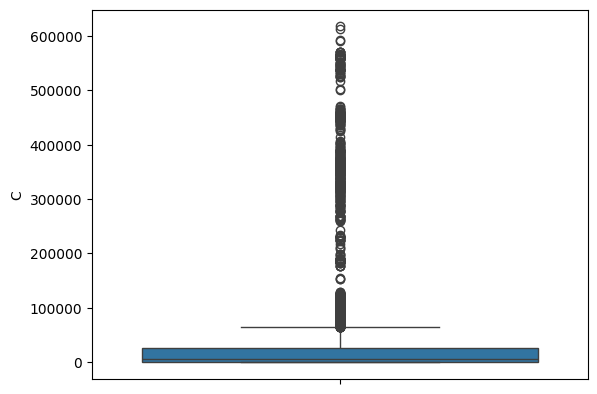

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df['C'])
plt.show()

Con esta columna es posible identificar que contiene muchos outliers, pues teniendo en cuenta el resumen estadístico y el diagrama de cajas, se observa que hay una gran diferencia entre el máximo y el promedio de los datos. De acuerdo con esto, no sería lo más apropiado llenar los valores nulos con la media, pues esta es más sensible a los outliers. En general considero que no es correcto llenar lo datos nulos con alguna medida que sea igual para todos, por lo que decidí consultar un poco sobre diferentes alternativas para llenar estos datos nulos y encontré algunas opciones, entre las cuales elegí una llamada imputación con K Nearest Neighbors.

Lo que hace es tomar la columna con datos nulos y por cada fila con estos datos, encuentra las filas más similares (de acuerdo con el resto de variables que se le pase). Esta similaridad la mide con la distancia euclidiana y finalmente el valor nulo lo reemplaza usando el promedio de los valores de los vecinos más cercanos para esa feature (la cantidad de vecinos cercanos que considera se puede variar, en este caso se usó con los 5 más cercanos).

Adicionalmente, las features que se usaron fueron determinadas usando la correlación con C

In [15]:
# Compute correlation matrix
numerical_df = df.drop(columns=['J'])
correlation_matrix = numerical_df.corr()

# Check correlation of column 'C' with other columns
correlation_with_C = correlation_matrix['C'].abs().sort_values(ascending=False)
print(correlation_with_C)

C         1.000000
A         0.045490
Fraude    0.039270
S         0.030964
B         0.023212
K         0.017975
H         0.017723
N         0.017504
Q         0.014060
D         0.013182
P         0.011952
I         0.011219
E         0.005867
G         0.005184
L         0.003927
F         0.002689
M         0.002085
O         0.001802
R         0.001289
Monto     0.000034
Name: C, dtype: float64


In [16]:
from sklearn.impute import KNNImputer
import joblib

# Create a copy of the data to modify
df['C_filled'] = df['C']

# Fit the imputer only on available features
features_for_imputation = ['C_filled', 'A', 'Monto', 'S']  # Exclude 'Fraude'
imputer = KNNImputer(n_neighbors=3)

# Impute only using available features
df[features_for_imputation] = imputer.fit_transform(df[features_for_imputation])

# Save the fitted imputer
joblib.dump(imputer, 'knn_imputer.pkl')


['knn_imputer.pkl']

In [17]:
# from sklearn.impute import KNNImputer
# df['C_filled']=df['C']

# imputer = KNNImputer(n_neighbors=3)

# # Step 3: Apply the imputer, only on the new column you created
# # Note: KNNImputer expects a 2D array, so we’ll select the columns to impute and use fit_transform
# df[['C_filled','A','Monto','Fraude','S']] = imputer.fit_transform(df[['C_filled','A','Monto','Fraude','S']])

In [18]:
df['C_filled'].describe()

,C_filled
count,16880.000000
mean,39292.802607
std,85518.311850
min,0.000000
25%,1618.333333
50%,7807.000000
75%,30962.250000
max,617324.000000


Revisamos cómo cambiaron los valores nulos por diferentes valores en cada fila

In [19]:
null_c_rows = df[df['C'].isnull()]
null_c_rows

,A,B,C,D,E,F,G,H,I,J,...,M,N,O,P,Q,R,S,Monto,Fraude,C_filled
33,11.0,9,NaN,0,0,0.0,0.0,0,0,UY,...,3,1,0,5,0.0,0.0,10.39,175.36,1,193463.666667
42,0.0,5,NaN,0,0,0.0,0.0,0,0,UY,...,2,1,0,2,0.0,0.0,47.21,328.11,1,31492.000000
45,0.0,9,NaN,0,0,0.0,0.0,0,0,UY,...,2,1,0,2,0.0,0.0,11.56,79.66,1,1405.333333
53,0.0,13,NaN,0,0,0.0,0.0,0,0,UY,...,1,1,0,2,0.0,0.0,18.36,71.48,1,3792.666667
66,0.0,15,NaN,0,1,0.0,0.0,0,0,UY,...,3,1,0,4,0.0,0.0,16.26,50.09,1,133.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,0.0,10,NaN,0,0,0.0,0.0,0,0,BR,...,2,1,0,4,0.0,0.0,44.82,98.74,1,1843.666667
16835,0.0,15,NaN,0,0,0.0,0.0,0,0,BR,...,1,1,0,1,0.0,0.0,35.64,99.66,1,9165.666667
16848,0.0,15,NaN,0,0,0.0,0.0,0,0,BR,...,1,1,0,1,0.0,0.0,1.25,80.70,1,150138.333333
16849,0.0,4,NaN,0,0,0.0,0.0,0,0,BR,...,1,1,0,1,0.0,0.0,22.57,580.08,1,123591.333333


También me gustaría evaluar más adelante si los datos nulos para la columna C puede llegar a ser relevantes o determinar algún patrón, por lo que voy a agregar otra columna que indique si la columna C es nula o no en la fila determinada.

In [20]:
df['C_is_null'] = df['C'].isnull().astype(int)

In [21]:
df

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,Monto,Fraude,C_filled,C_is_null
0,0.0,10,50257.0,0,0,0.000,0.0,0,0,UY,...,1,0,5,0.0,0.0,7.25,37.51,1,50257.0,0
1,0.0,10,29014.0,0,0,0.000,0.0,0,0,UY,...,1,0,3,0.0,0.0,11.66,8.18,1,29014.0,0
2,0.0,7,92.0,0,1,0.000,0.0,0,1,UY,...,1,0,2,0.0,0.0,86.97,13.96,1,92.0,0
3,9.0,16,50269.0,0,0,0.000,0.0,0,0,UY,...,1,0,5,0.0,0.0,2.51,93.67,1,50269.0,0
4,0.0,8,8180.0,0,0,0.000,0.0,0,0,UY,...,1,0,1,0.0,0.0,25.96,135.40,1,8180.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,0.0,3,63302.0,0,1,0.500,0.0,0,0,BR,...,1,0,1,0.0,0.0,85.73,132.17,1,63302.0,0
16876,0.0,12,825.0,0,0,0.000,0.0,0,0,BR,...,1,0,5,0.0,0.0,12.50,26.34,1,825.0,0
16877,1.0,3,81067.0,0,0,0.000,0.0,0,0,BR,...,1,0,1,0.0,0.0,24.16,195.63,1,81067.0,0
16878,0.0,9,398372.0,0,0,0.000,0.0,0,0,BR,...,1,0,1,0.0,0.0,29.00,36.97,1,398372.0,0


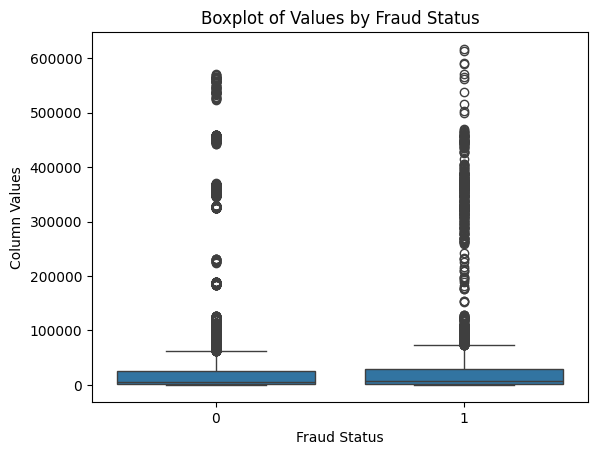

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Fraude', y='C', data=df)
plt.title('Boxplot of Values by Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Column Values')
plt.show()


In [23]:
# Define threshold for outliers (e.g., values greater than the 99th percentile)
threshold = df['C'].quantile(0.99)

# Filter data into outliers and non-outliers
outliers = df[df['C'] > threshold]
non_outliers = df[df['C'] <= threshold]

# Calculate fraud rates in each subset
fraud_rate_outliers = outliers['Fraude'].mean()
fraud_rate_non_outliers = non_outliers['Fraude'].mean()

print("Fraud rate among outliers:", fraud_rate_outliers)
print("Fraud rate among non-outliers:", fraud_rate_non_outliers)

Fraud rate among outliers: 0.22627737226277372
Fraud rate among non-outliers: 0.2972833308725823


Ahora voy a eliminar la columna C, pues ya no se va a trabajar más con ella

In [24]:
del df['C']

La siguiente columna que vamos a evaluar respecto a sus datos nulos es K

In [25]:
df['K'].describe()

,K
count,4016.000000
mean,0.682099
std,0.153264
min,0.120000
25%,0.580000
50%,0.680000
75%,0.800000
max,0.990000


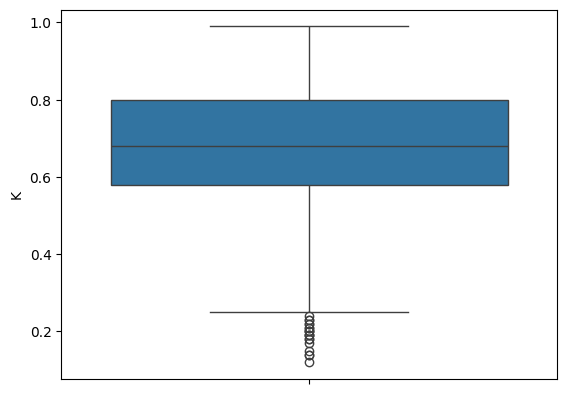

In [26]:
sns.boxplot(data=df['K'])
plt.show()

La cantidad de datos nulos de esta columna es demasiada como para considerar alguna forma de llenarlos sin afectar de manera considerable el modelo, por lo que, antes de pensar en descartar la columna, podemos revisar si el hecho de que haya una gran cantidad de datos nulos nos da información relevante para el modelo.

In [27]:
df['K_is_null'] = df['K'].isnull().astype(int)

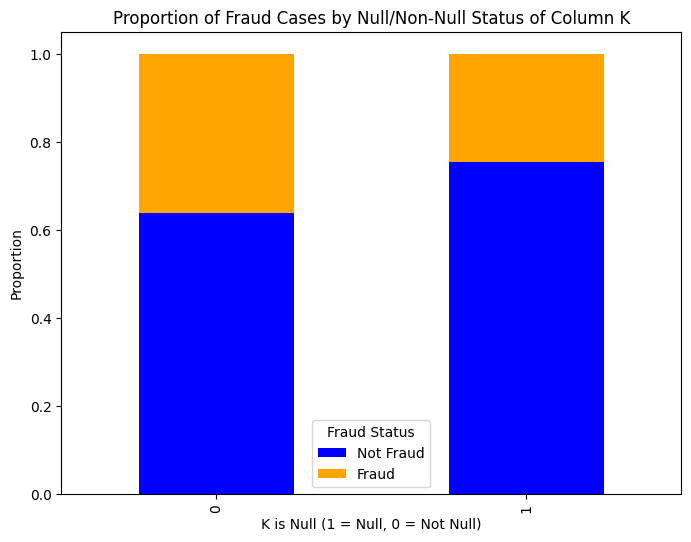

In [28]:
# Group by 'K_is_null' and 'is_fraud' to get counts
grouped = df.groupby(['K_is_null', 'Fraude']).size().unstack()

# Calculate proportions within each null/non-null group
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Plotting
proportions.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(8, 6))
plt.title('Proportion of Fraud Cases by Null/Non-Null Status of Column K')
plt.xlabel('K is Null (1 = Null, 0 = Not Null)')
plt.ylabel('Proportion')
plt.legend(['Not Fraud', 'Fraud'], title="Fraud Status")
plt.show()

Considero que no hay una tendencia muy clara que puede llegar a determinar si el valor es nulo o no, sin embargo, voy a dejar esta columna para continuar estudiándola más adelante.

Ahora vamos a realizar un diagrama de caja para cada variable numérica, dividiendo los datos entre fraude y no fraude para observar si hay diferencias significativas

22


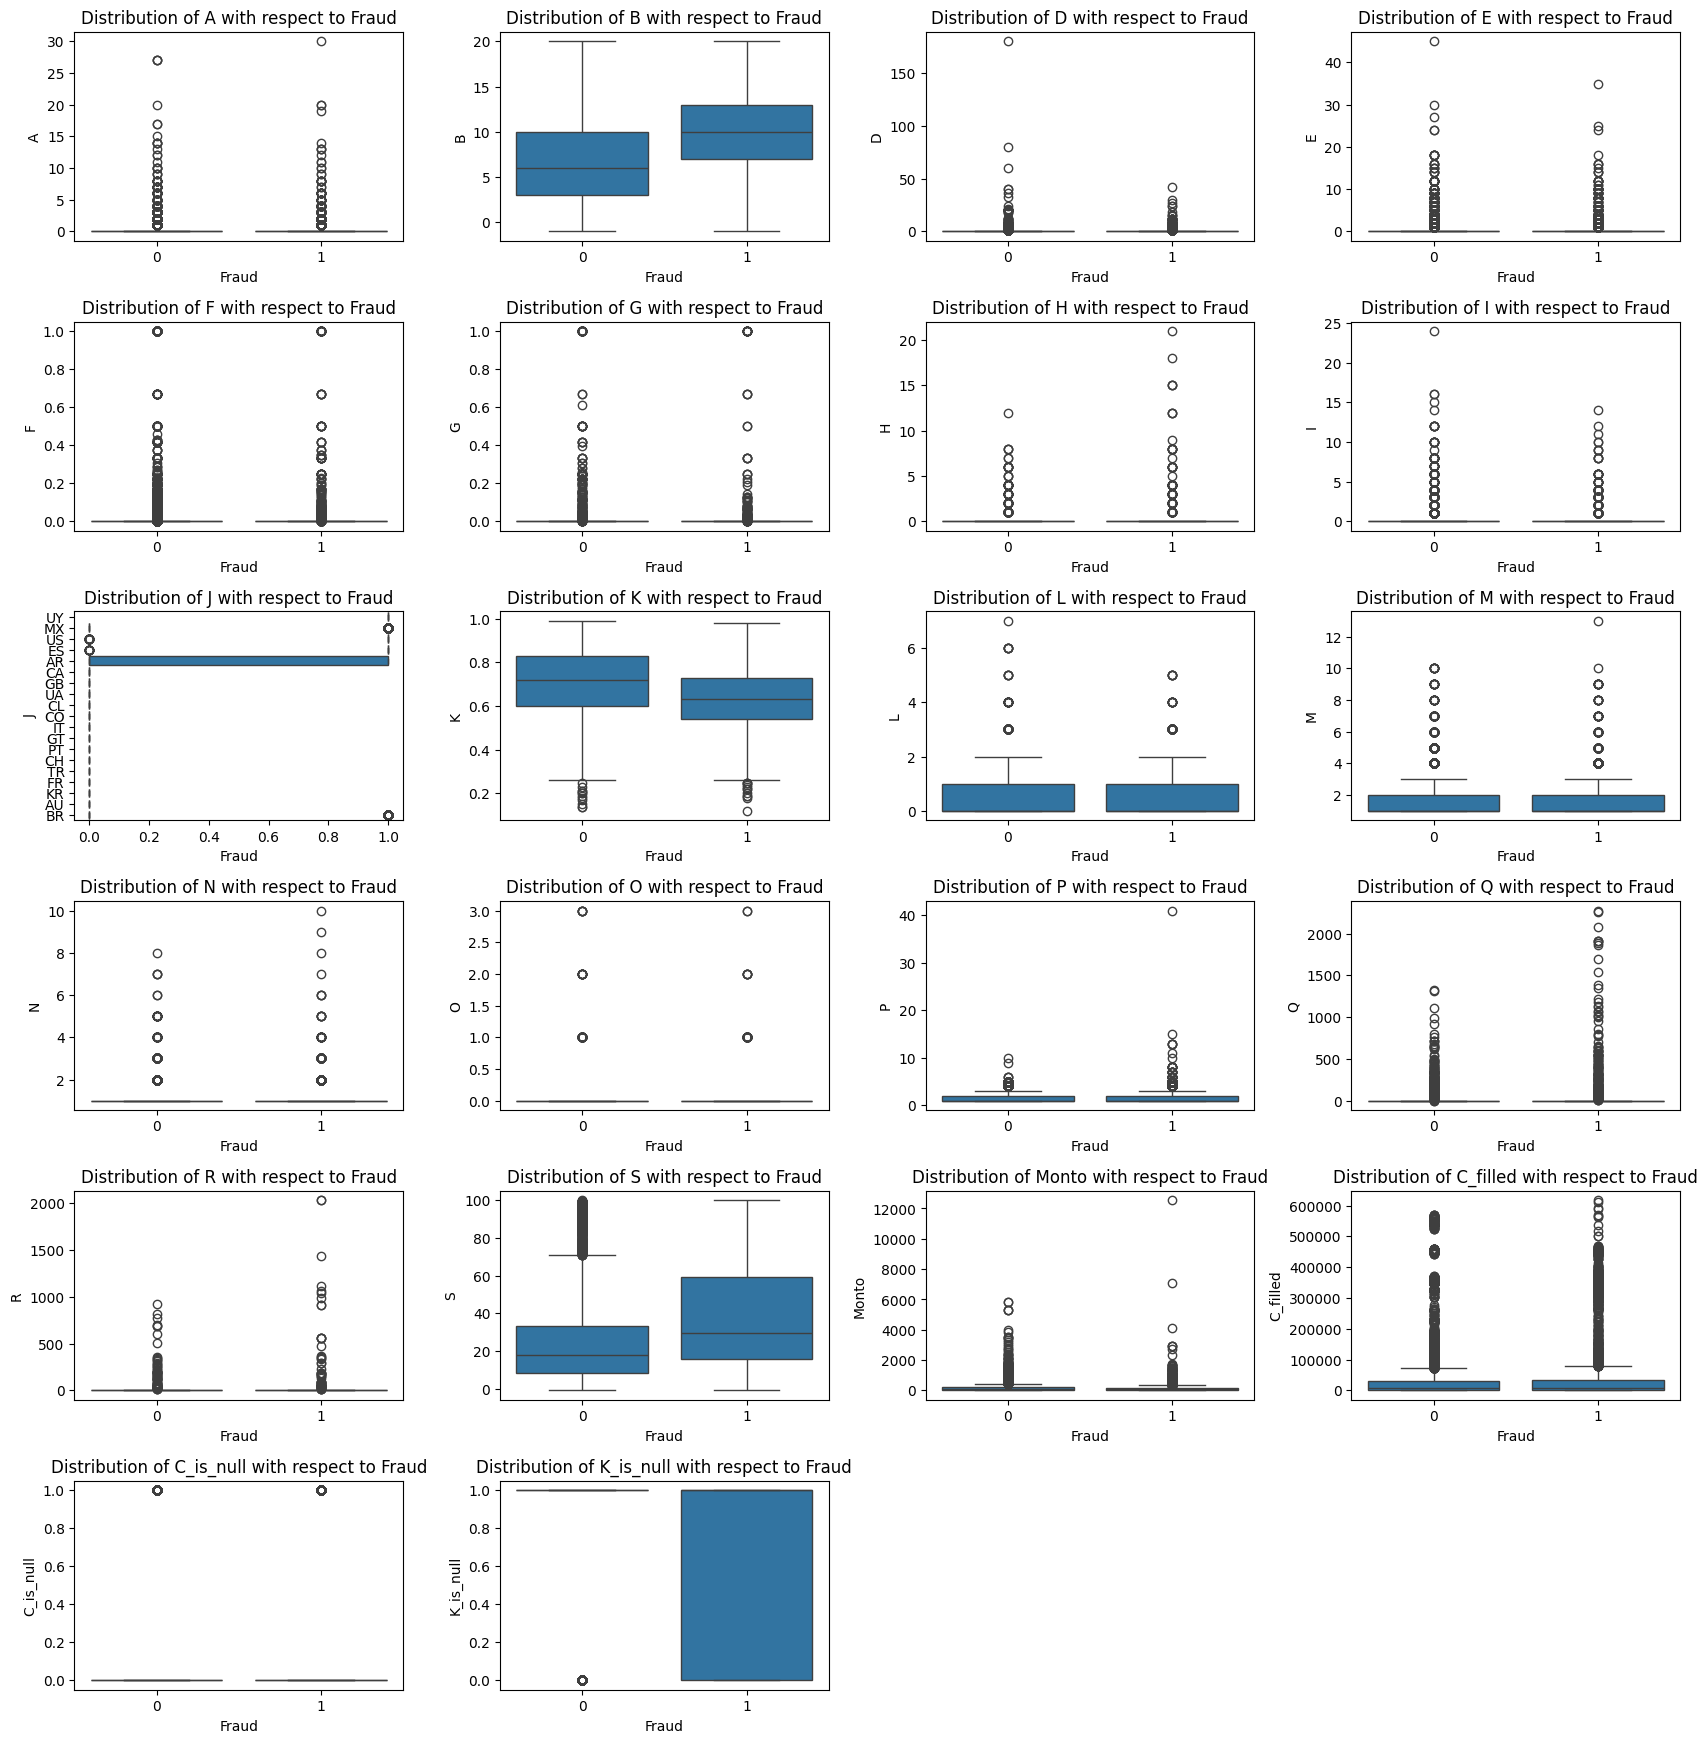

In [29]:
# Get all features excluding 'Fraude'
columns_to_plot = [column for column in df.columns if column != 'Fraude']
print(len(columns_to_plot))

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(17, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each feature and plot on the respective axis
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Fraude', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} with respect to Fraud')
    axes[i].set_xlabel('Fraud')
    axes[i].set_ylabel(column)

# Remove any empty subplots if there are fewer than 10 columns to plot
if len(columns_to_plot) < len(axes):
    for i in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Estos diagramas de caja nos sirven para identificar que la mayoría de las columnas contienen outliers, con los cuales no es posible identificar relaciones entre cada variable con el target, a excepción de B, donde parece que la mediana para casos de fraude es mayor que la de no fraude. También se observa un comportamiento similar con la variable S.

Además de esto, los diagramas de caja también nos da una idea sobre entre qué rango y escala se mueven los datos. Vemos que hay muchas diferencias entre ellos, por lo tanto vamos a normalizar.

A lo largo del curso se ha usado la transformación log1p, sin embargo, me pareció importante consultar acerca de otras técnicas de normalización que tuvieran en cuenta outliers, pues estos podrían ser relevantes para el modelo. En sklearn.preprocessing hay varias alternativas, de las cuales usaré 2: RobustScaler y QuantileTransformer, además de la tranformación con logaritmo vista previamente. Voy a generar diferentes columnas para cada normalización y comparar cómo se relaciona cada una con el target, pero en este caso a partir de histogramas para intentar hacer que se facilite la visualización e interpretación

In [30]:
del df['K']

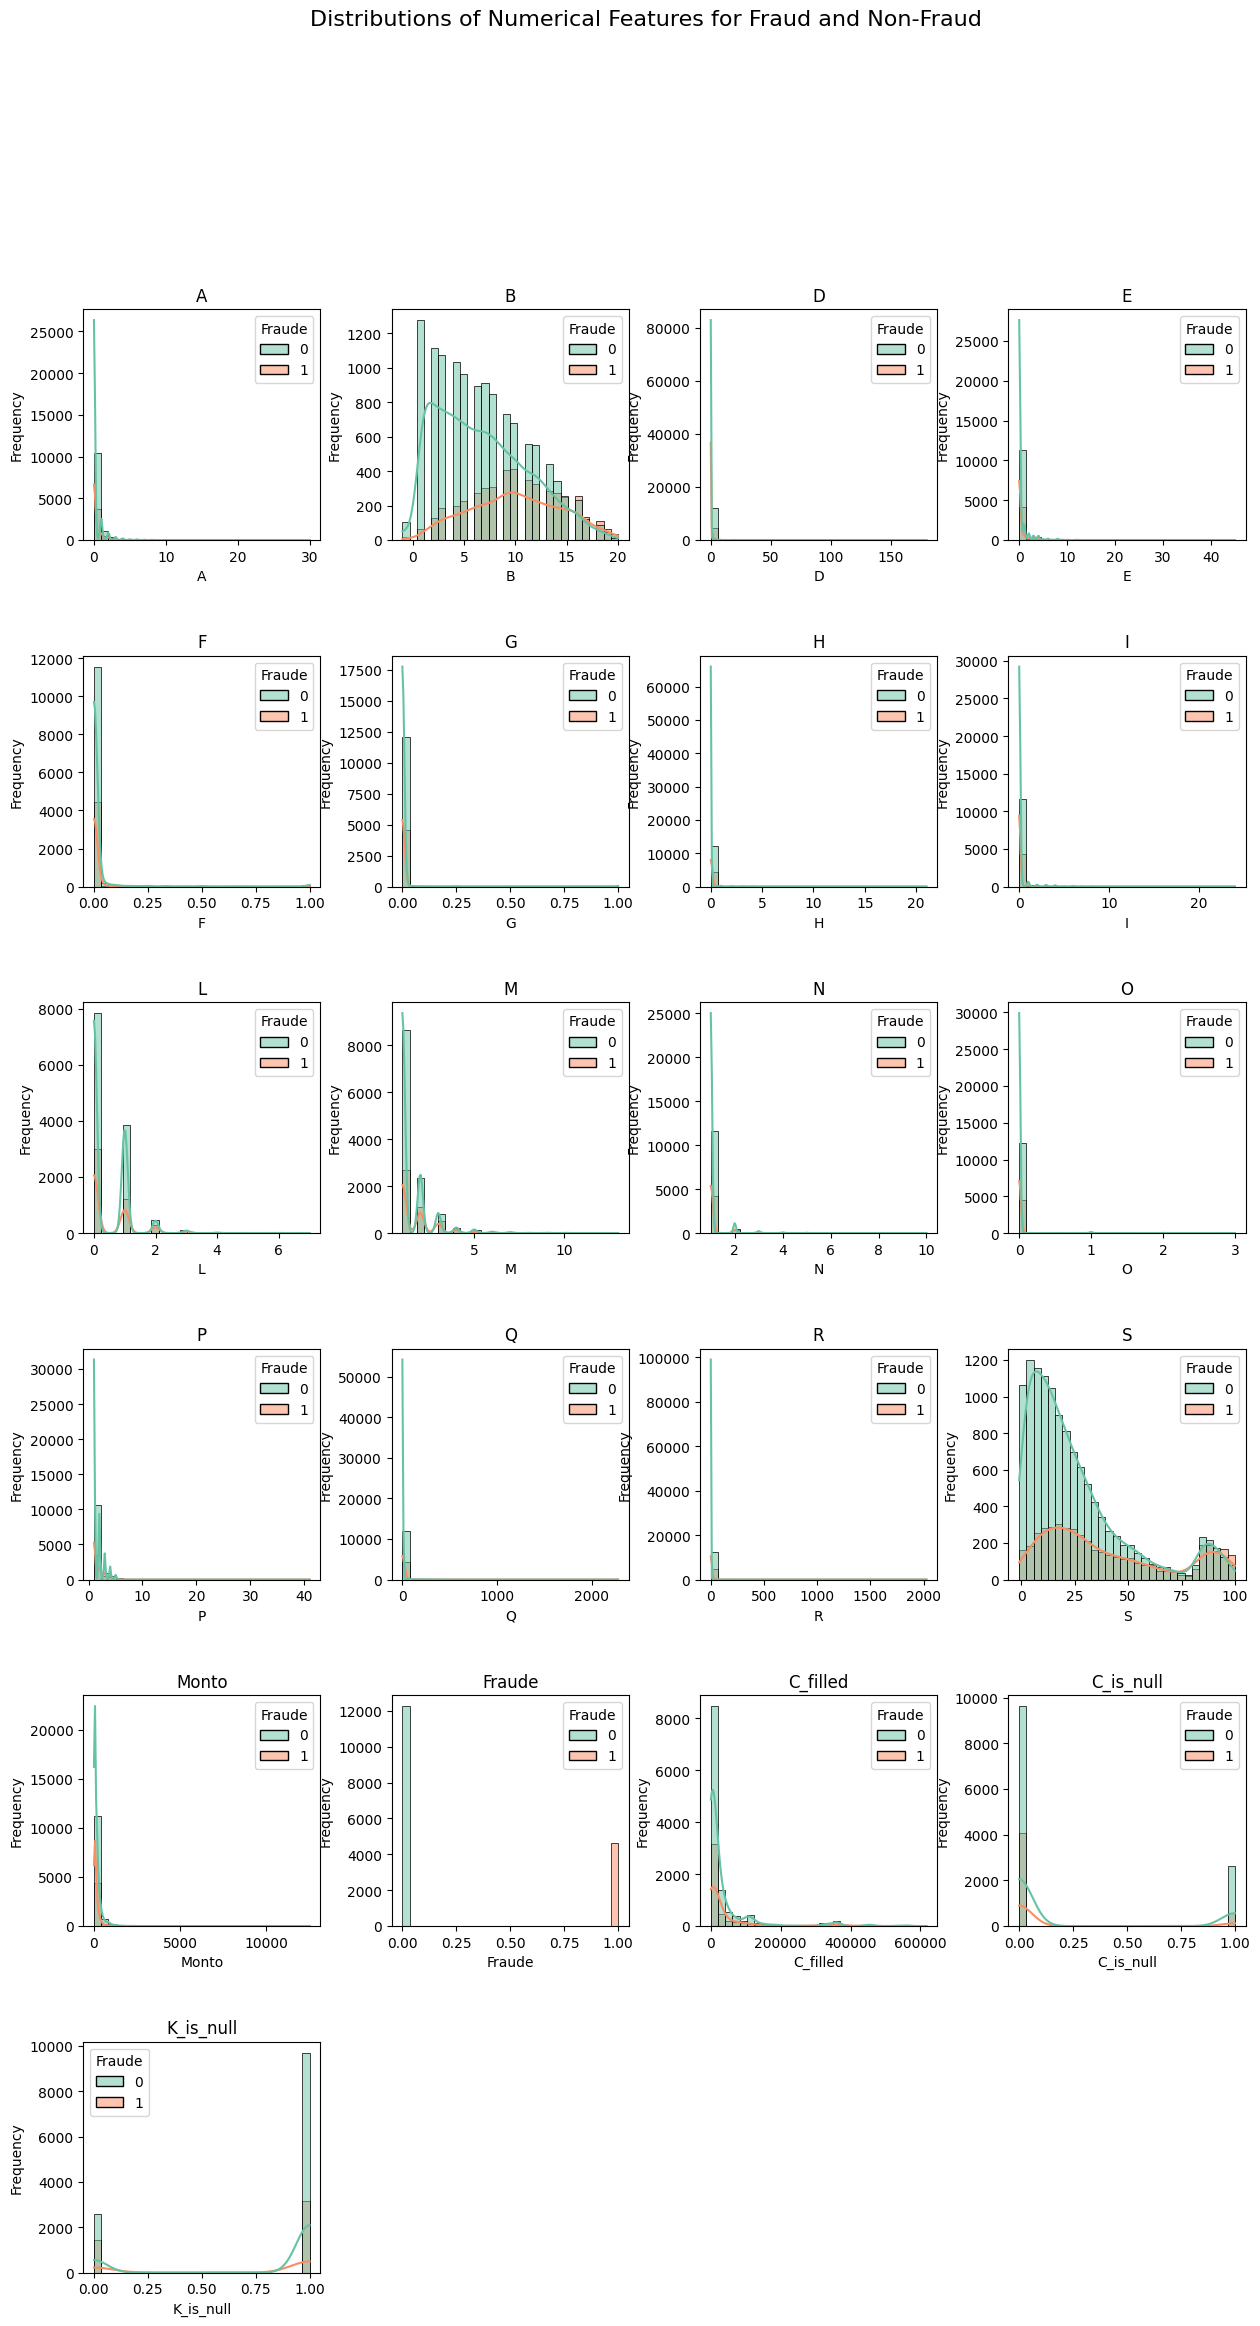

In [31]:
import numpy as np
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

rows, cols = 7, 4

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
fig.suptitle('Distributions of Numerical Features for Fraud and Non-Fraud', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each feature in a subplot
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue='Fraude', bins=30, kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

A simple vista no parece haber una tendencia muy marcada en alguna variable para casos de fraude, solo se observa que ambas tienen picos similares. Vamos a observar los mismos gráficos con difentes técnicas de normalización esperando que tal vez con alguna transformación se muestre más claramente un patrón

In [32]:
from sklearn.preprocessing import RobustScaler

# Initialize the Robust Scaler
scaler = RobustScaler()

# Identify columns with max value > 30
columns_to_scale = [col for col in df.select_dtypes(include=['number']).columns if df[col].max() > 30]

# Scale and add new columns
for col in columns_to_scale:
    # Reshape and scale the column
    scaled_data = scaler.fit_transform(df[[col]])

    # Add scaled data as a new column with '_scaled' suffix
    df[f'{col}_robust_scaled'] = scaled_data

# Save the trained scaler
joblib.dump(scaler, 'robust_scaler.pkl')

['robust_scaler.pkl']

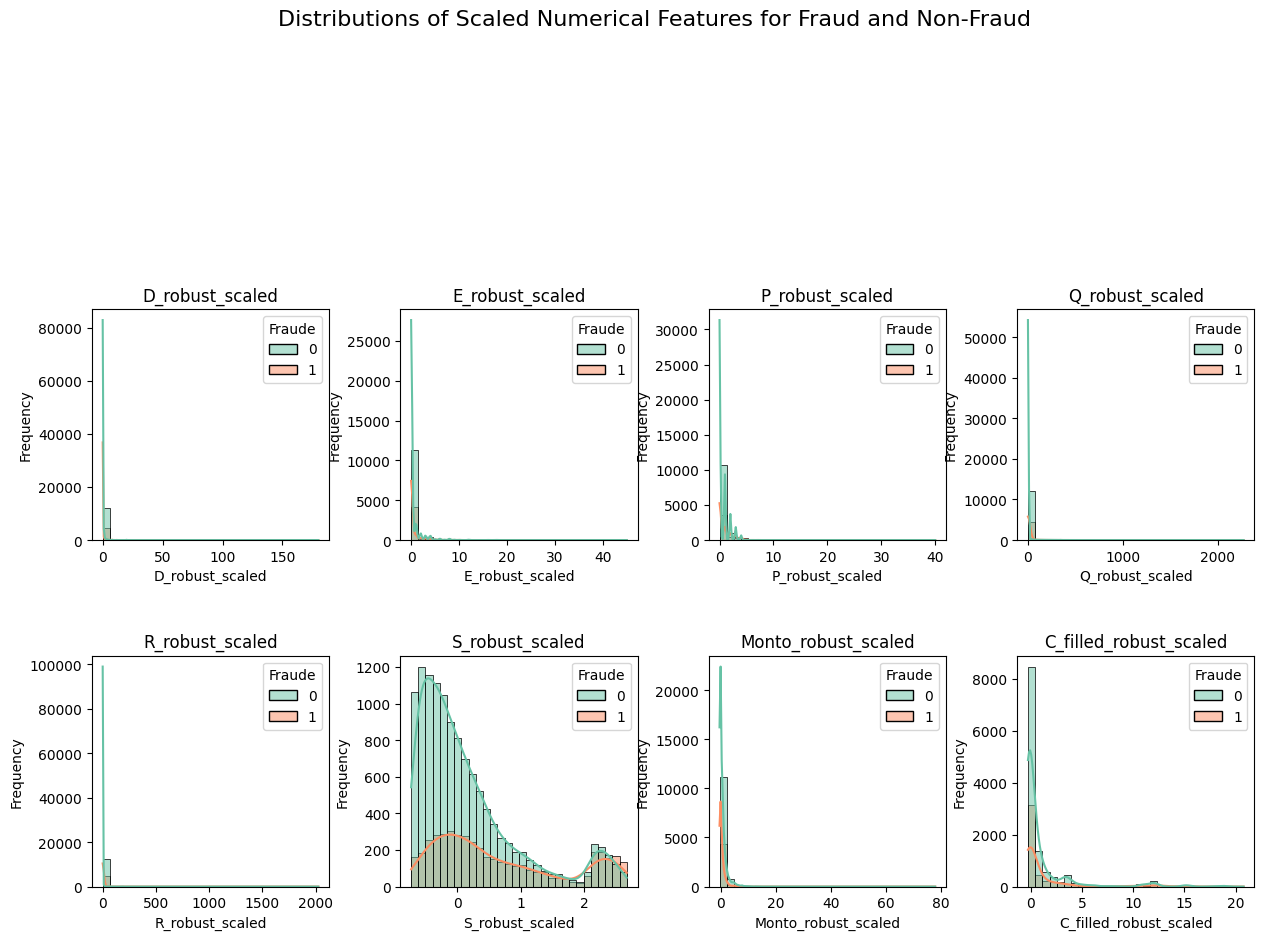

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only scaled columns (those with '_scaled' suffix)
scaled_features = [col for col in df.columns if col.endswith('_scaled')]

# Define the number of rows and columns for subplots
rows, cols = 7, 4

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
fig.suptitle('Distributions of Scaled Numerical Features for Fraud and Non-Fraud', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each scaled feature in a subplot
for i, feature in enumerate(scaled_features):
    sns.histplot(data=df, x=feature, hue='Fraude', bins=30, kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if fewer than rows * cols
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.show()


In [34]:
from sklearn.preprocessing import QuantileTransformer
# Quantile Transformation
quantile_transformer = QuantileTransformer(output_distribution='uniform')

# Identify columns with max value > 30
columns_to_scale = [col for col in df.select_dtypes(include=['number']).columns if df[col].max() > 30 and col not in scaled_features]

# Scale and add new columns
for col in columns_to_scale:
    # Reshape and scale the column
    scaled_data = quantile_transformer.fit_transform(df[[col]])

    # Add scaled data as a new column with '_scaled' suffix
    df[f'{col}_quantile_transformed'] = scaled_data

joblib.dump(quantile_transformer, 'quantile_transformer.pkl')

['quantile_transformer.pkl']

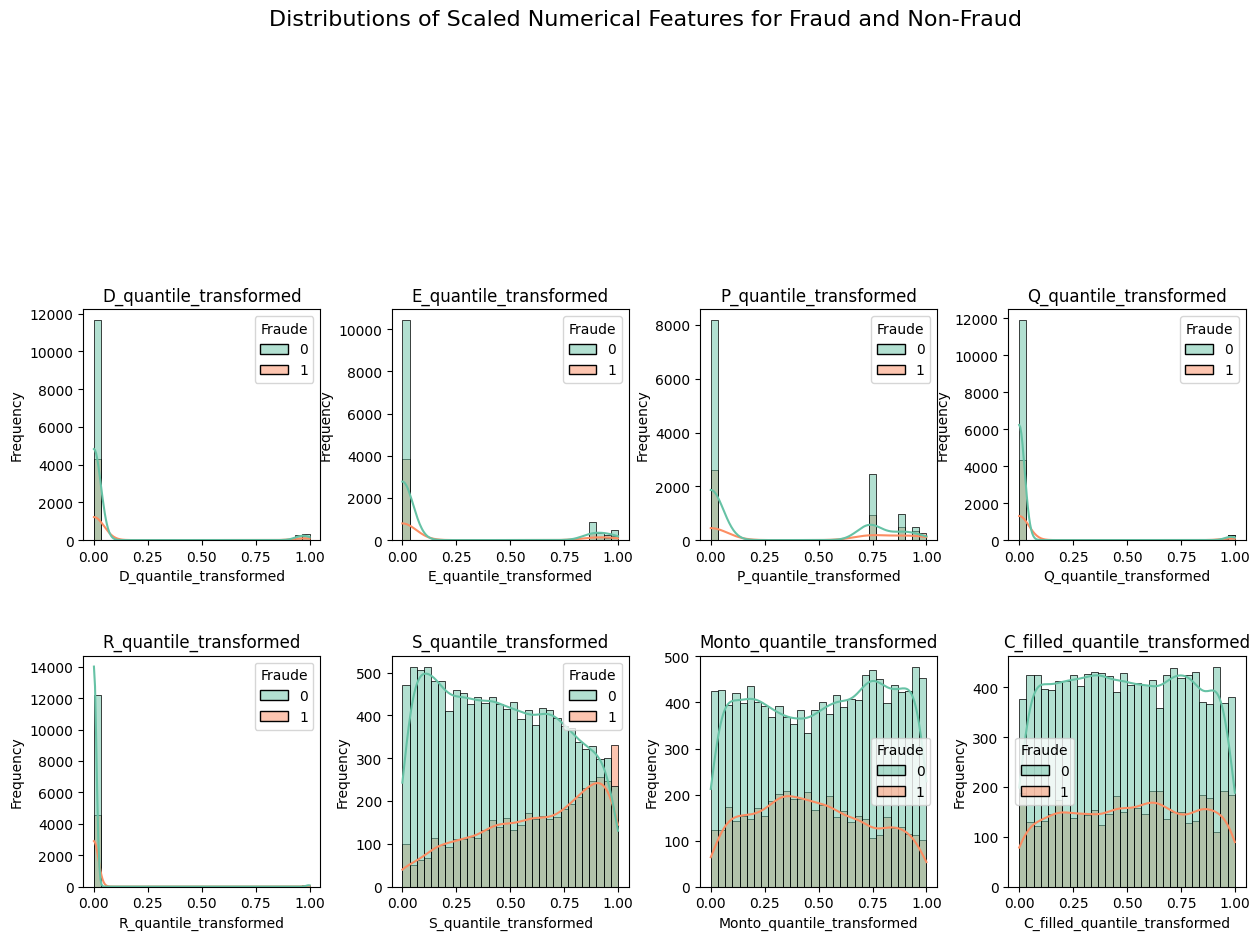

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only scaled columns (those with '_scaled' suffix)
scaled_features = [col for col in df.columns if col.endswith('_quantile_transformed')]

# Define the number of rows and columns for subplots
rows, cols = 7, 4

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
fig.suptitle('Distributions of Scaled Numerical Features for Fraud and Non-Fraud', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each scaled feature in a subplot
for i, feature in enumerate(scaled_features):
    sns.histplot(data=df, x=feature, hue='Fraude', bins=30, kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if fewer than rows * cols
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.show()

Engeneral no parece haber alguna tendencia clara, pero me parece importante mencionar algo que trato de interpretar de la gráfica "S_quantile_transformed" y es que a medida que el valor de la variable va aumentando, los clasificados como fraude también van aumentando mientras que los de no fraude disminuyen, por lo tanto, esta podría considerarme en el modelo

Para tranformación usando logaritmo primero revisamos que los datos sean mayores o iguales a cero

In [36]:
for feature in numerical_features:
  print(feature)
  print(df[feature].min())

A
0.0
B
-1
D
0
E
0
F
0.0
G
0.0
H
0
I
0
L
0
M
1
N
1
O
0
P
1
Q
0.0
R
0.0
S
-1.0
Monto
0.05
Fraude
0
C_filled
0.0
C_is_null
0
K_is_null
0


In [37]:
    # Apply log1p transformation

for feature in numerical_features:
  df[f'{feature}_log'] = np.log1p(df[feature]+1)

Vemos que hay valores de $-1$ por lo que es necesario sumar $1$ a la transformación y así evitar indeterminados

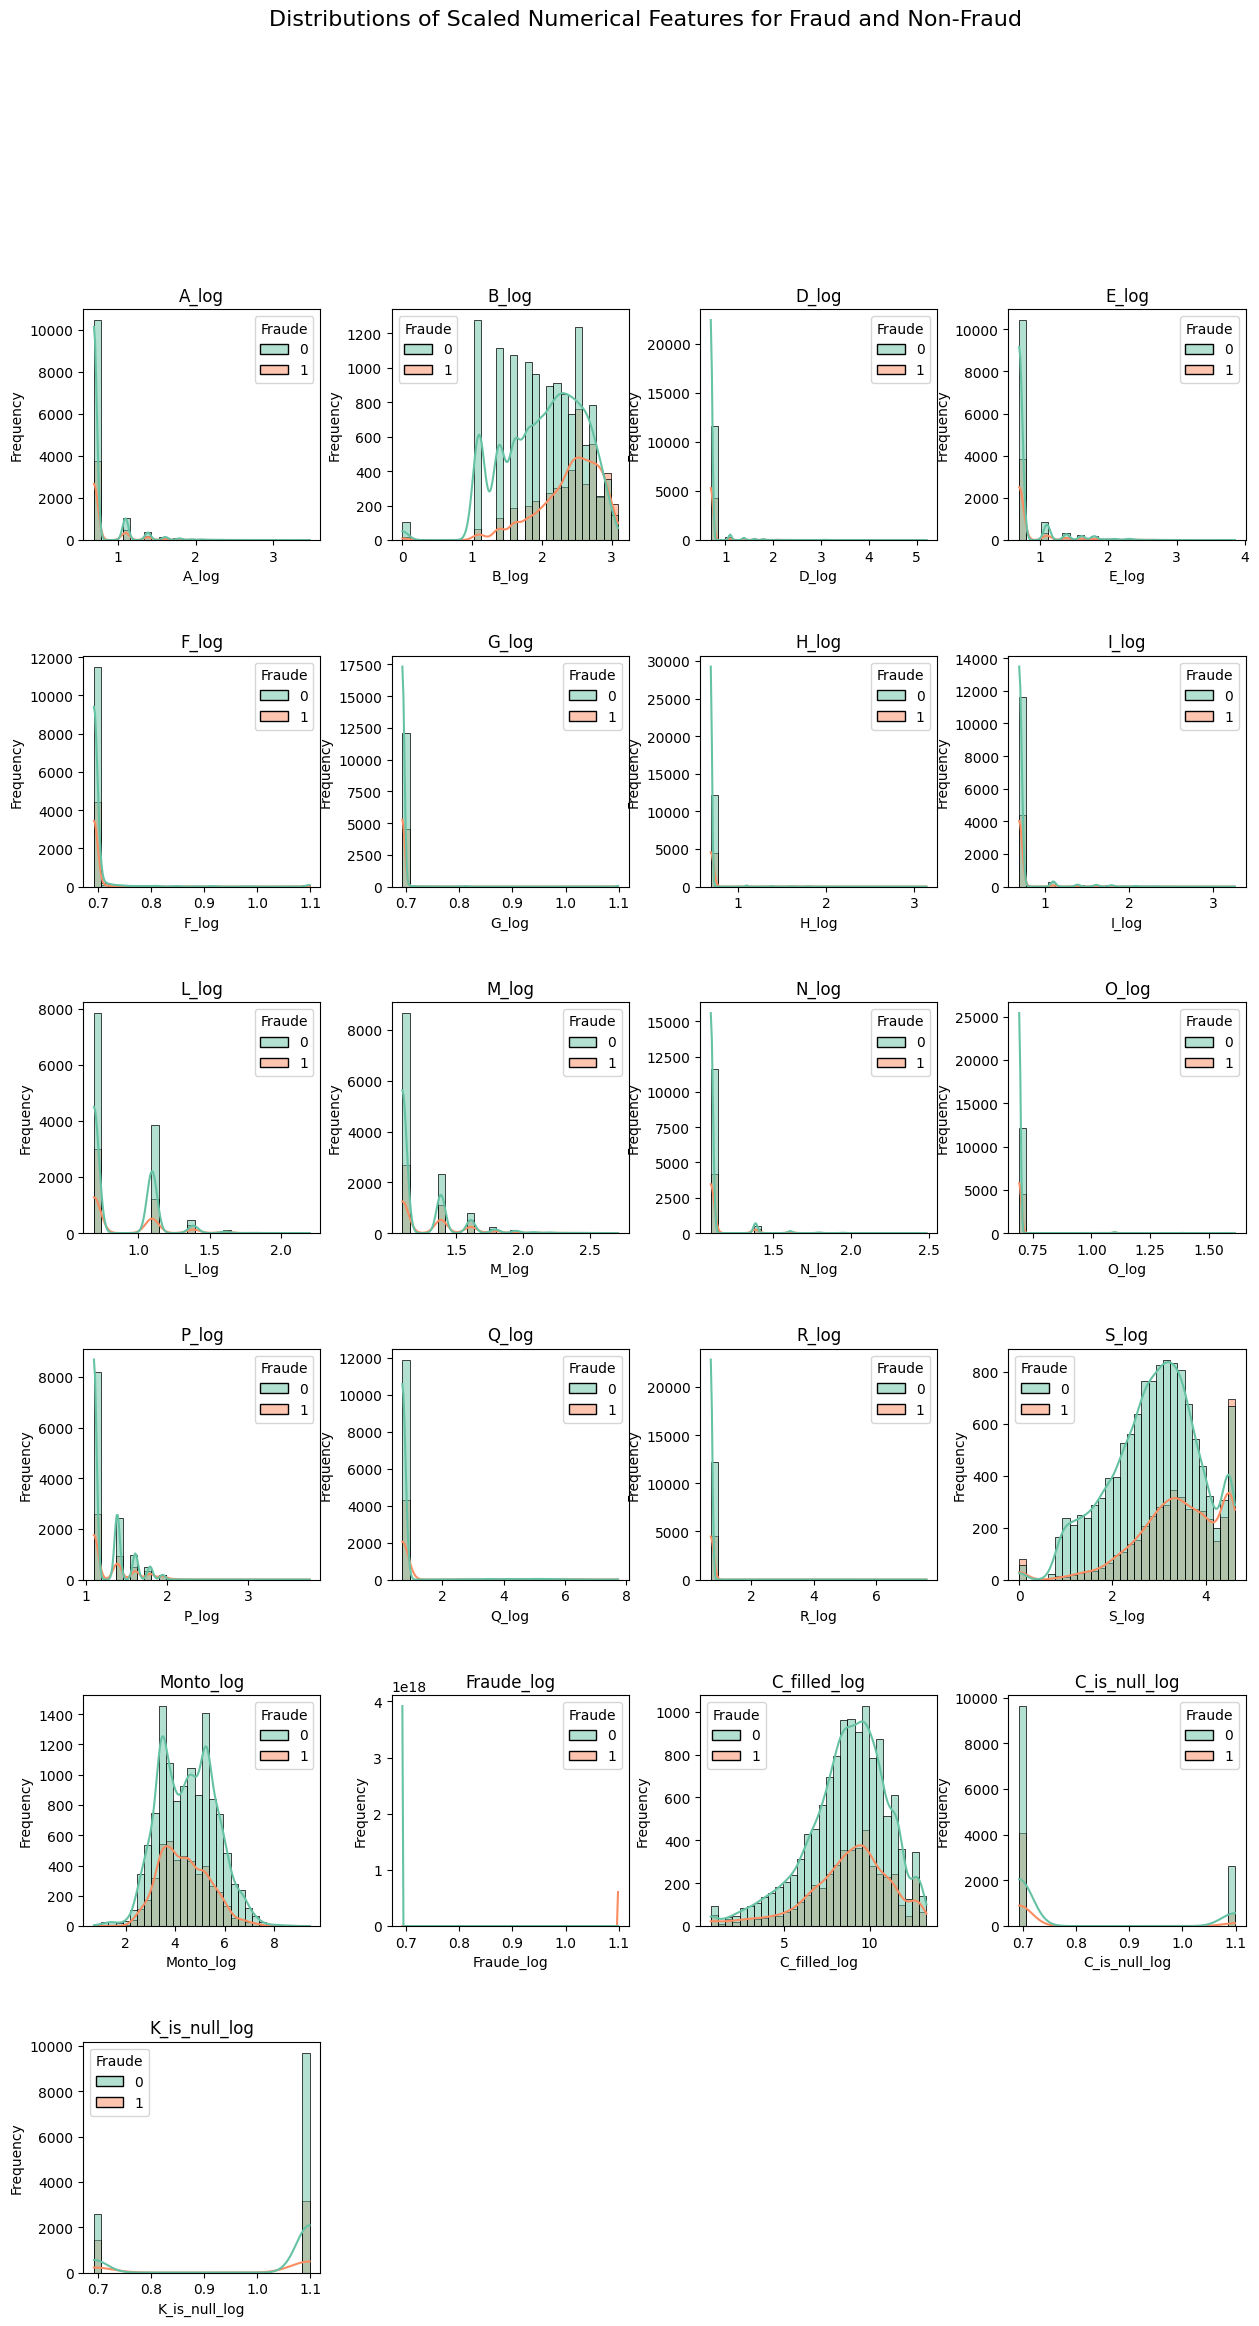

In [38]:
# Select only scaled columns (those with '_scaled' suffix)
scaled_features = [col for col in df.columns if col.endswith('_log')]

# Define the number of rows and columns for subplots
rows, cols = 7, 4

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 30))
fig.suptitle('Distributions of Scaled Numerical Features for Fraud and Non-Fraud', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each scaled feature in a subplot
for i, feature in enumerate(scaled_features):
    sns.histplot(data=df, x=feature, hue='Fraude', bins=30, kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if fewer than rows * cols
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.show()

Finalmente con esta tampoco encuentro mucha información. En resumen, con estas gráficas fue posible obtener 3 features que son candidatas a considerar para el entrenamiento del modelo: B, S, S_quantile_transformed.

Aunque aquí hay que tener en cuenta que no estén correlacionadas las últimas dos, o escoger una de ellas. Esto lo estudiamos con la covarianza más adelante.

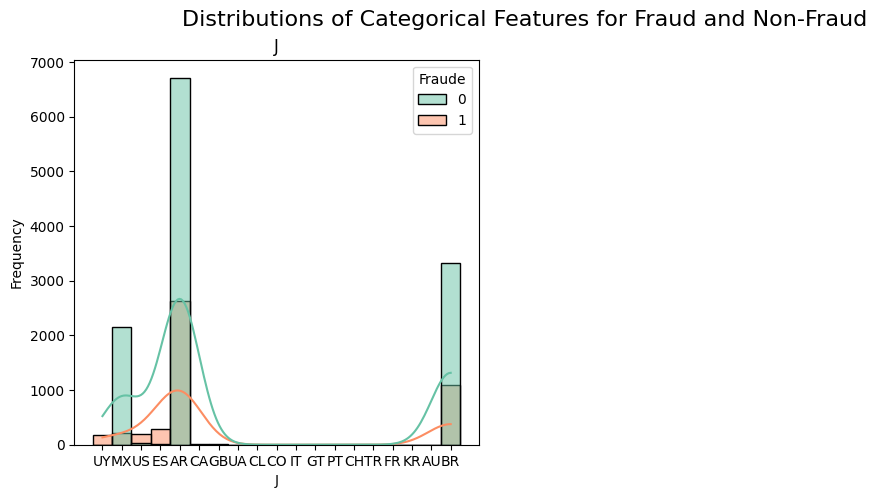

In [39]:
# Select only scaled columns (those with '_scaled' suffix)
categorical_features = ['J']

# Define the number of rows and columns for subplots
rows, cols = 1, 2

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 5))
fig.suptitle('Distributions of Categorical Features for Fraud and Non-Fraud', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each scaled feature in a subplot
for i, feature in enumerate(categorical_features):
    sns.histplot(data=df, x=feature, hue='Fraude', bins=30, kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if fewer than rows * cols
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.show()

Tampoco parece haber mucha información relevante.

Vamos a ver qué tan balanceada está la data, para considerar el uso de modelos que tengan en cuenta esta desproporción de los datos para cada categoría

In [40]:
# Check for class imbalance
print(df['Fraude'].value_counts(normalize=True))

Fraude
0    0.726836
1    0.273164
Name: proportion, dtype: float64


También es posible notar que la columna Fraude está como float por lo que sería conveniente que fuera simplemente enteros

Por último hallamos la correlación entre todas las variables

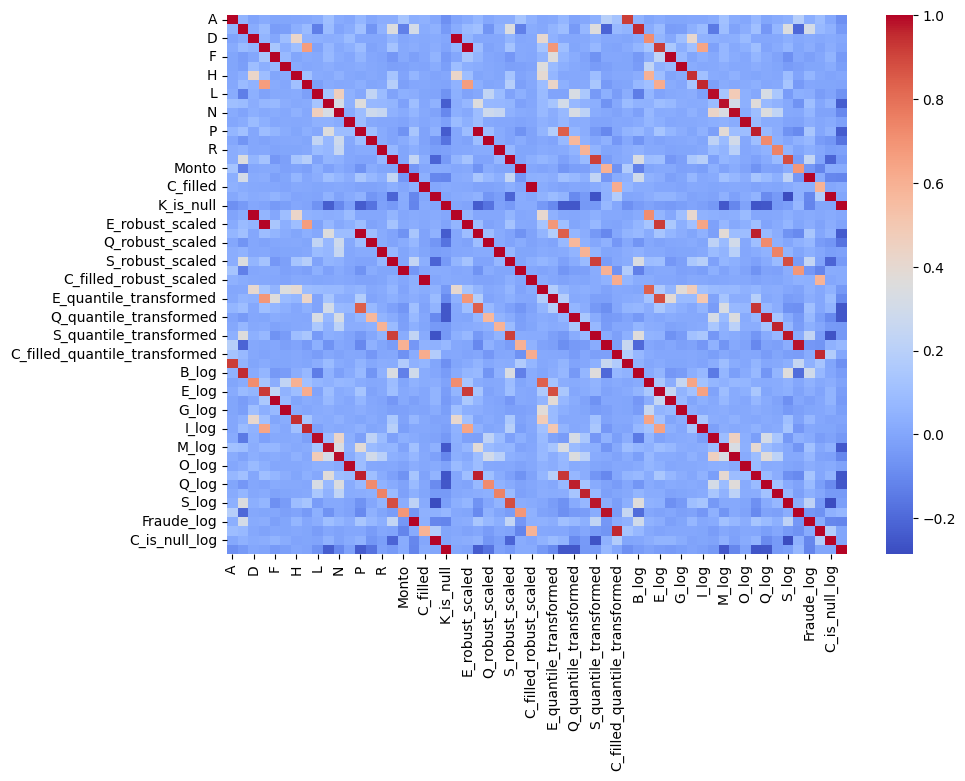

In [41]:
numerical_type_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
corr_num = df[numerical_type_cols].corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(corr_num, cmap="coolwarm", annot=False)

plt.show()

In [42]:
numerical_type_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
correlation_matrix = df[numerical_type_cols].corr()

# Extract the correlation values with the 'Fraude' column
fraud_correlation = correlation_matrix['Fraude']

# Sort by absolute values in descending order
sorted_fraud_correlation = fraud_correlation.reindex(fraud_correlation.abs().sort_values(ascending=False).index)

# Print the sorted correlations
sorted_fraud_correlation

,Fraude
Fraude_log,1.000000
Fraude,1.000000
B,0.307906
B_log,0.293636
S_robust_scaled,0.240414
S,0.240414
S_quantile_transformed,0.234184
S_log,0.220753
P,0.140629
P_robust_scaled,0.140629


A pesar de que es una matriz bastante grande, igual se observan algunas correlaciones entre las variables, sin embargo, lo más relevante en este punto era determinar cuáles variables explican en mayor medida los casos de fraude y no se encontraron demasiadas variables, en teoría solo fueron dos: B y S. Luego también identificamos algún posible comportamiento con la variable S escalada. De igual forma, también se listan algunas de las features cuya correlación con el target fue la más alta (en valor absoluto), lo cual nos puede ayudar a tener un primer acercamiento a un modelo y en esta fase, considerar si se usan más features u otras diferentes. Por el momento están en la siguiente lista:

In [43]:
significant_features=['B', 'S_robust_scaled', 'P_robust_scaled','M_log',
                      'K_is_null', 'C_is_null', 'Q_log', 'N_log',
                      'H_log', 'Monto_quantile_transformed', 'D_log',
                      'A_log', 'C_filled_robust_scaled', 'R_log', 'O_log']

# Parte 2

En esta segunda parte del desarrollo se implementarán diferentes modelos para comparar métricas y obtener el mejor para ponerlo en producción.

Lo primero que hacemos es limpiar el dataframe únicamente con las variables significativas que listamos anteriormente, además de agregar la variable cualitativa de País y haciéndola numérica usando One Hot Encoding

In [44]:
df1 = df[significant_features]

In [45]:
df1['country']=df['J']

<ipython-input-45-55b2844a2776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['country']=df['J']


In [46]:
df1 = pd.get_dummies(df1, columns=['country'], drop_first=False)

Y observamos la correlación entre las variables que seleccionamos:

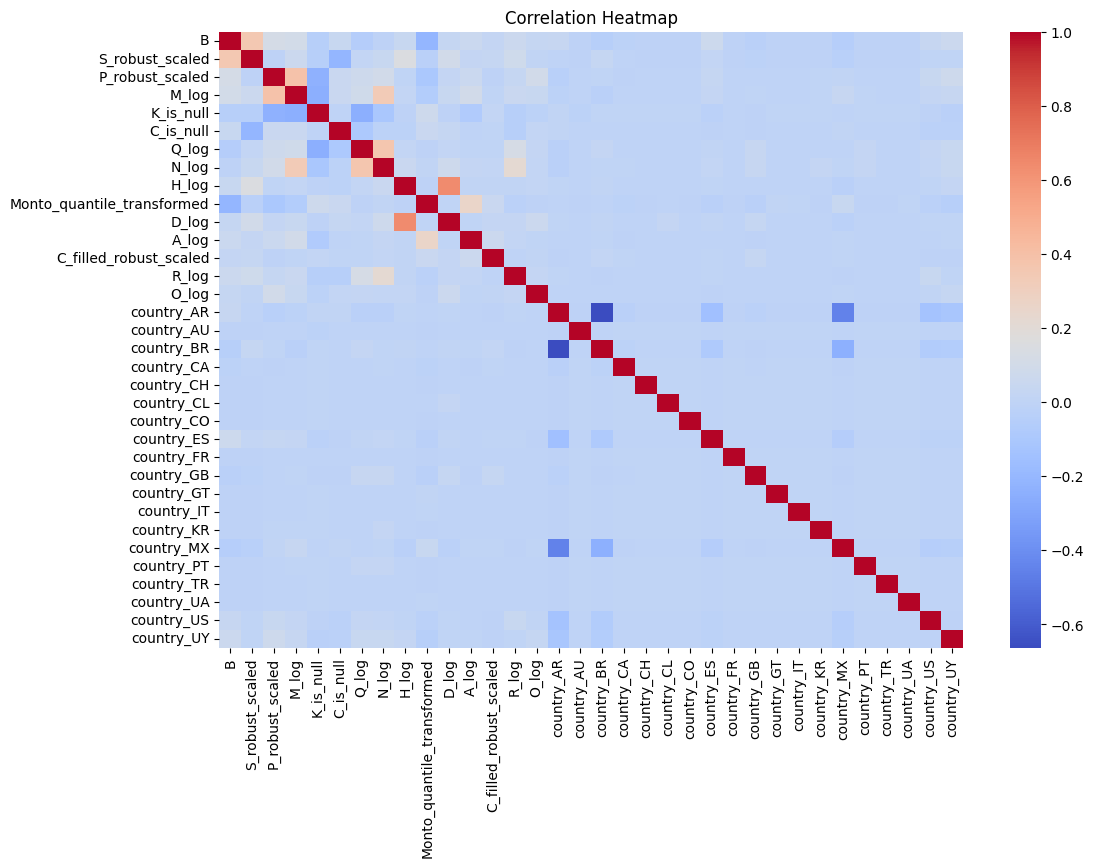

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df1.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [48]:
df1

,B,S_robust_scaled,P_robust_scaled,M_log,K_is_null,C_is_null,Q_log,N_log,H_log,Monto_quantile_transformed,...,country_GB,country_GT,country_IT,country_KR,country_MX,country_PT,country_TR,country_UA,country_US,country_UY
0,10,-0.451564,4.0,1.609438,0,0,0.693147,1.098612,0.693147,0.289447,...,False,False,False,False,False,False,False,False,False,True
1,10,-0.302841,2.0,1.098612,1,0,0.693147,1.098612,0.693147,0.011521,...,False,False,False,False,False,False,False,False,False,True
2,7,2.236911,1.0,1.609438,1,0,0.693147,1.098612,0.693147,0.047432,...,False,False,False,False,False,False,False,False,False,True
3,16,-0.611416,4.0,1.609438,0,0,0.693147,1.098612,0.693147,0.537095,...,False,False,False,False,False,False,False,False,False,True
4,8,0.179412,0.0,1.098612,1,0,0.693147,1.098612,0.693147,0.642709,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,3,2.195093,0.0,1.098612,1,0,0.693147,1.098612,0.693147,0.633291,...,False,False,False,False,False,False,False,False,False,False
16876,12,-0.274513,4.0,1.098612,1,0,0.693147,1.098612,0.693147,0.152778,...,False,False,False,False,False,False,False,False,False,False
16877,3,0.118708,0.0,1.098612,0,0,0.693147,1.098612,0.693147,0.753341,...,False,False,False,False,False,False,False,False,False,False
16878,9,0.281932,0.0,1.386294,1,0,0.693147,1.098612,0.693147,0.280480,...,False,False,False,False,False,False,False,False,False,False


Adicionalmente, este no es un paso muy relevante pero veo que el target está como flotante cuando podría ser un entero, por lo que convierto toda la columna

In [49]:
df['Fraude'] = df['Fraude'].astype(int)

In [50]:
df['Fraude']

,Fraude
0,1
1,1
2,1
3,1
4,1
...,...
16875,1
16876,1
16877,1
16878,1


Ahora que tenemos los datos, lo siguiente es dividir los conjuntos en train, validation y test. En este punto, encontré una opción de scikit learn que permite conservar la proporción de las clases (dado que observamos que están desbalanceadas) en cada uno de los subconjuntos que se obtienen. Esto se realiza con el parámetro `stratify` de la función `train_test_split`. Dividimos entonces los datos y observamos las proporciones de las clases en cada uno:

In [51]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df1  # Features
y = df['Fraude']               # Target

# Step 1: Split into train+validation and test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Split train+validation into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Check class distributions
print("Train class distribution:", y_train.value_counts(normalize=True))
print("Validation class distribution:", y_val.value_counts(normalize=True))
print("Test class distribution:", y_test.value_counts(normalize=True))


Train class distribution: Fraude
0    0.726797
1    0.273203
Name: proportion, dtype: float64
Validation class distribution: Fraude
0    0.726896
1    0.273104
Name: proportion, dtype: float64
Test class distribution: Fraude
0    0.726896
1    0.273104
Name: proportion, dtype: float64


Los primeros modelos que vamos a entrenar, teniendo en cuenta el desbalance de las clases, serán usando parámetros dentros de los mismos modelos que le dan mayor peso a la clase minotaria.

En primer lugar definimos funciones que nos dan las métricas, que entrenan y prueban los modelos con la data de validación.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_probability_distribution(y_val, y_pred_probs, model_name):
    # Separate predicted probabilities by class
    fraude = y_pred_probs[y_val == 1]
    no_fraude = y_pred_probs[y_val == 0]

    # Create the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(fraude, bins=20, alpha=0.6, color='g', label='Fraud')
    plt.hist(no_fraude, bins=20, alpha=0.6, color='r', label='No Fraud')
    plt.title(f'Probability Distribution - Validation Set ({model_name})')
    plt.xlabel('Predicted Probability of Fraud')
    plt.ylabel('Frequency')
    plt.legend(loc='best')
    plt.show()


def train_and_evaluate(model, X_train, y_train, X_val, y_val, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Validation evaluation
    val_pred = model.predict(X_val)
    val_pred_probs = model.predict_proba(X_val)[:, 1]  # Predicted probabilities for class 1 (fraud)

    print(f"Validation Performance ({model_name}):")
    print(classification_report(y_val, val_pred))

    # Confusion matrix
    cm = confusion_matrix(y_val, val_pred)
    plot_confusion_matrix(cm, classes=['No Fraud', 'Fraud'], title=f'Confusion Matrix ({model_name})')

    # Probability distribution histogram
    #plot_probability_distribution(y_val, val_pred_probs, model_name)

    return model



Validation Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2454
           1       0.69      0.40      0.51       922

    accuracy                           0.79      3376
   macro avg       0.75      0.67      0.69      3376
weighted avg       0.78      0.79      0.77      3376



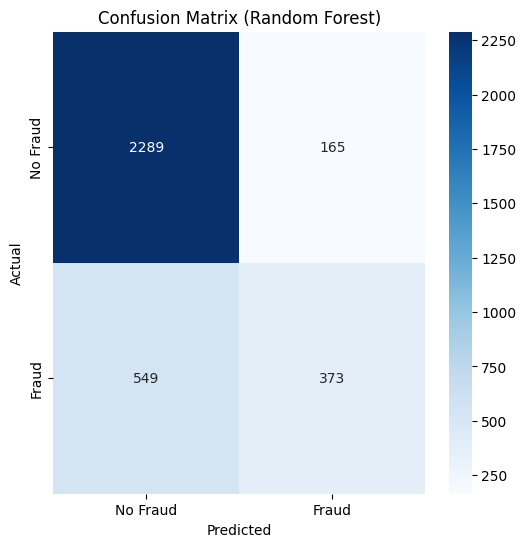

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model = train_and_evaluate(
    rf_model, X_train, y_train, X_val, y_val, 'Random Forest')


Primero vemos que el modelo con Random Forest predice muy bien las observaciones que no son fraude, sin embargo, lo que queremos priorizar es que determine de forma correcta el fraude y esta proporción está muy mala, pues en realida clasifica más de forma incorrecta los que deberían ser fraude

Validation Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      2454
           1       0.52      0.75      0.62       922

    accuracy                           0.75      3376
   macro avg       0.71      0.75      0.71      3376
weighted avg       0.79      0.75      0.76      3376



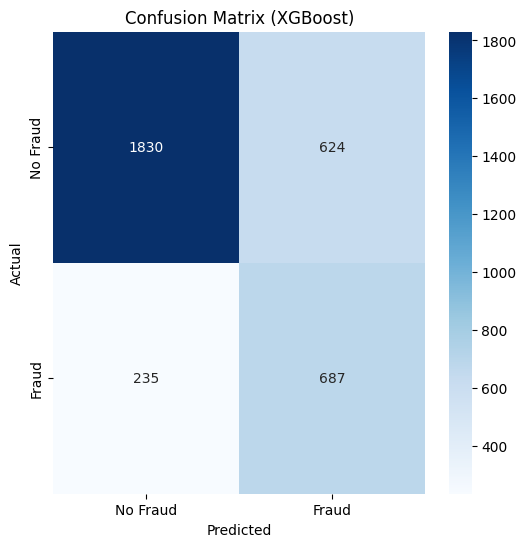

In [54]:
import xgboost as xgb

# Calculate scale_pos_weight for XGBoost
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, eta=0.05)
xgb_model = train_and_evaluate(

    xgb_model, X_train, y_train, X_val, y_val, 'XGBoost')


Con XGBoost parece haber una mejoría en los casos que clasifica correctamente como fraude, sin embargo, vamos a explorar otras técnicas para ver si es posible mejorar aún más la matriz de confusión, tanto para casos de fraude como no fraude

Para esto vamos a usar la técnica de **undersampling**, donde se reduce el número de observaciones de la clase dominante para que sea proporcional a las observaciones de la clase minoritaria. Para esto hay muchas opciones, que buscan seleccionar de manera adecuada la muestra representativa de la clase dominante. Para ver cómo van afectando estas diferentes técnicas el desempeño del modelo, primero vamos a partir de la más básica que es separar los datos por clases y elegir de forma aleatoria, de la clase dominante, la misma cantidad de observaciones de la clase minoritaria

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2454
           1       0.51      0.74      0.60       922

    accuracy                           0.73      3376
   macro avg       0.69      0.73      0.70      3376
weighted avg       0.78      0.73      0.75      3376



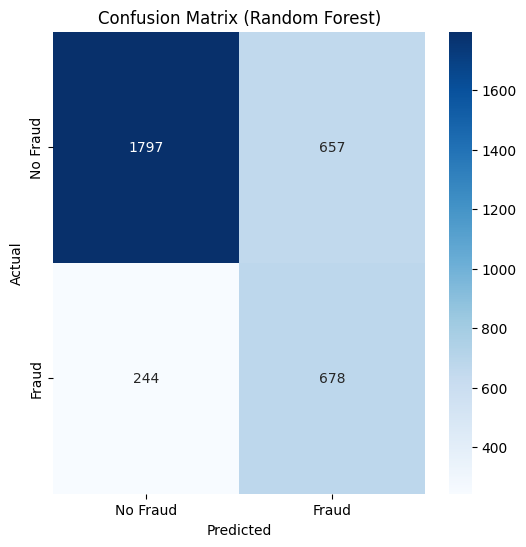

Validation Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2454
           1       0.52      0.77      0.62       922

    accuracy                           0.74      3376
   macro avg       0.71      0.75      0.71      3376
weighted avg       0.79      0.74      0.75      3376



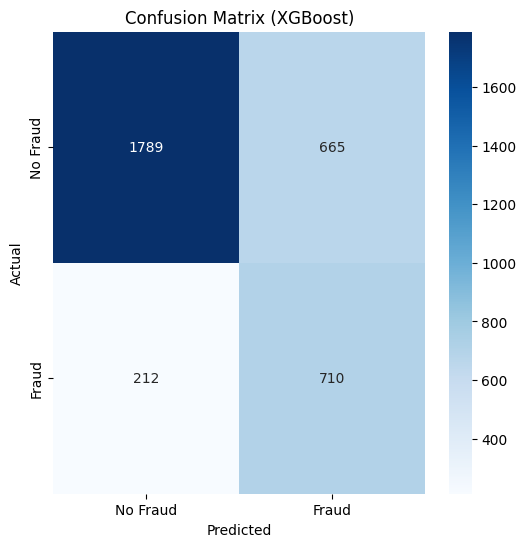

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Validation Performance (AdaBoost):
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      2454
           1       0.49      0.72      0.58       922

    accuracy                           0.72      3376
   macro avg       0.68      0.72      0.68      3376
weighted avg       0.77      0.72      0.73      3376



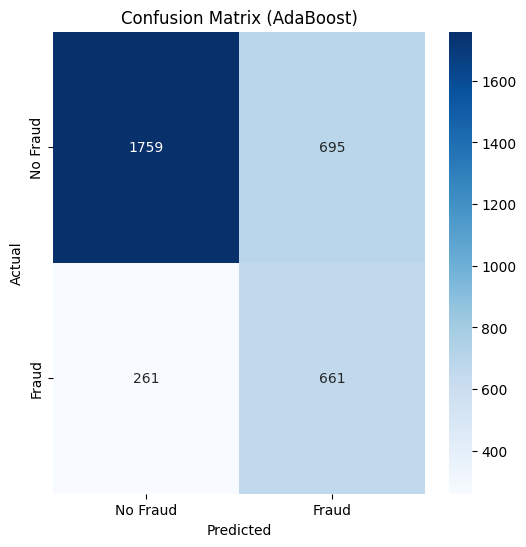

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      2454
           1       0.50      0.75      0.60       922

    accuracy                           0.73      3376
   macro avg       0.69      0.74      0.70      3376
weighted avg       0.78      0.73      0.74      3376



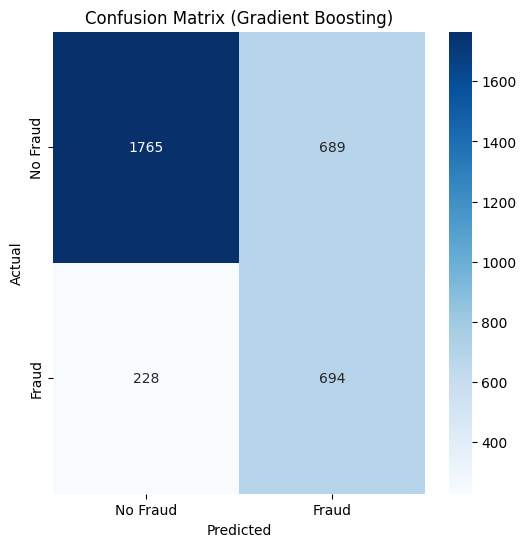

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb


# Step 1: Undersample the majority class in the training set
# Separate the majority and minority class data in the training set
X_majority = X_train[y_train == 0]
X_minority = X_train[y_train == 1]
y_majority = y_train[y_train == 0]
y_minority = y_train[y_train == 1]

# Downsample the majority class to match the size of the minority class
X_majority_undersampled, y_majority_undersampled = resample(X_majority, y_majority,
                                                           replace=False,  # Don't replace, random sampling
                                                           n_samples=len(y_minority),  # Match the size of minority class
                                                           random_state=42)  # For reproducibility

# Combine the undersampled majority class with the minority class
X_train_undersampled = np.vstack((X_majority_undersampled, X_minority))
y_train_undersampled = np.hstack((y_majority_undersampled, y_minority))

# Step 2: Initialize and train models with undersampled training data
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(eta=0.08,scale_pos_weight=1),
    'AdaBoost': AdaBoostClassifier(random_state=42, learning_rate=1.5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, learning_rate=0.05, min_samples_split=4)
}

# Step 3: Train models and evaluate metrics
for name, model in models.items():
    modelm = train_and_evaluate(model, X_train_undersampled, y_train_undersampled, X_val, y_val, name)

Es posible observar que los casos de fraude acertados mejoraron en gran medida cuando usamos undersampling, sin embargo, vemos que esto se debe a cambio de desmejorar las predicciones de no fraude correctas, lo cual es comprensible dado que tiene menos datos para entrenarse y aprender sobre esta clase.

In [56]:
X_train_undersampled.shape

(5534, 34)

Ahora usamos unas técnicas un poco más sofisticadas. La primera es TomekLinks. Lo que hace esta técnica es que elimina los vecinos más cercanos de la clase minoritaria que pertenezcan a la clase dominante. De esta forma incluso puede ayudar a remover ruido del modelo.

Original training set size: 10128
Tomek Links training set size: 9461
Validation Performance (Random Forest - tomek):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2454
           1       0.64      0.47      0.54       922

    accuracy                           0.78      3376
   macro avg       0.73      0.69      0.70      3376
weighted avg       0.77      0.78      0.77      3376



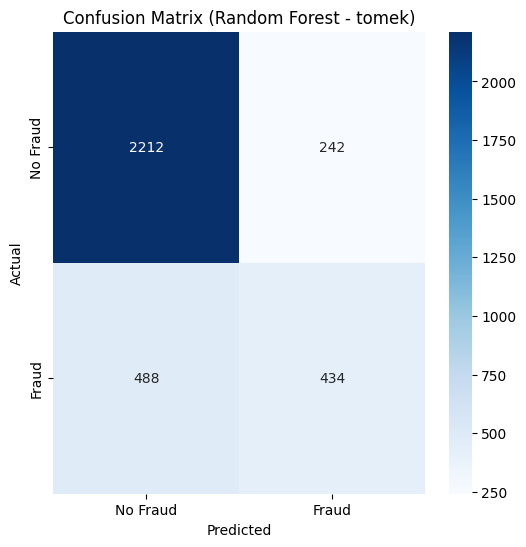

Validation Performance (XGBoost - tomek):
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      2454
           1       0.53      0.75      0.62       922

    accuracy                           0.75      3376
   macro avg       0.71      0.75      0.71      3376
weighted avg       0.79      0.75      0.76      3376



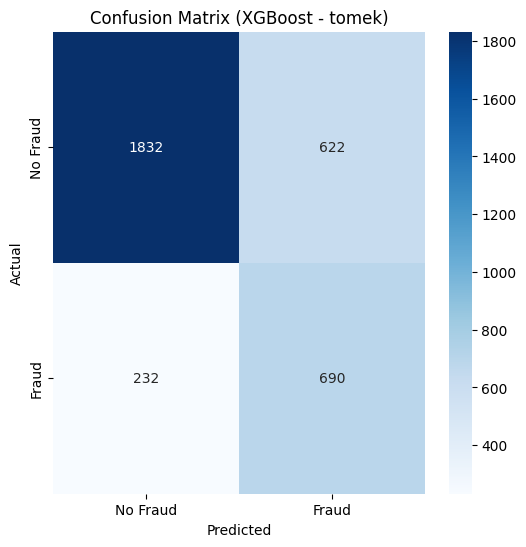

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation Performance (AdaBoost- tomek):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2454
           1       0.66      0.45      0.54       922

    accuracy                           0.79      3376
   macro avg       0.74      0.68      0.70      3376
weighted avg       0.77      0.79      0.77      3376



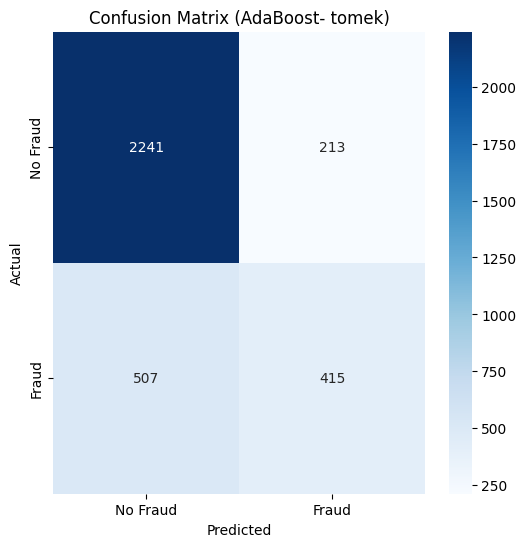

Validation Performance (Gradient Boosting - tomek):
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2454
           1       0.70      0.41      0.52       922

    accuracy                           0.79      3376
   macro avg       0.75      0.67      0.69      3376
weighted avg       0.78      0.79      0.77      3376



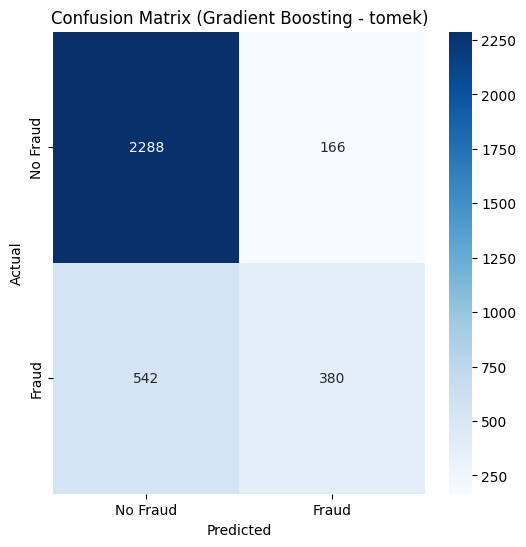

In [57]:
from imblearn.under_sampling import TomekLinks

# Apply Tomek Links undersampling to the training data
tomek = TomekLinks(sampling_strategy='majority')
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

print("Original training set size:", X_train.shape[0])
print("Tomek Links training set size:", X_train_tomek.shape[0])

# Re-train models on the Tomek Links-processed data
models = {
    "Random Forest - tomek": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost - tomek": xgb.XGBClassifier(eta=0.1,scale_pos_weight=len(y_train_tomek[y_train_tomek == 0]) / len(y_train_tomek[y_train_tomek == 1]), random_state=42),
    "AdaBoost- tomek": AdaBoostClassifier(random_state=42),
    "Gradient Boosting - tomek": GradientBoostingClassifier(random_state=42, learning_rate=0.05),
}

# Step 3: Train models and evaluate metrics
for name, model in models.items():
    modelm = train_and_evaluate(model, X_train_tomek, y_train_tomek, X_val, y_val, name)

Observamos que con TomekLinks se empeoran mucho las predicciones para fraude, por lo que esta técnica no es nada efectiva para nuestro problema. El mejor resultado se obtuvo con XGBoost pero también hay que tener en cuenta que se usó nuevamente el parámetro que le da más peso a la clase minoritaria, por lo que esto también pudo haber ayudado al modelo.

Ahora usamos otras dos técnicas: NearMiss y ClusterCentroids. Sinceramente no logro entender completamente cómo funciona NearMiss, en cambio con ClusterCentroids sí comprendo que agrupa los datos de la clase dominante en clusters y los datos que se toman son los centroides de estos clusters, es decir, como un promedio de los datos del cluster.


Applying NearMiss...
Original training set size: 10128
NearMiss training set size: 8301

Training Random Forest with NearMiss...
Validation Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2454
           1       0.57      0.54      0.55       922

    accuracy                           0.76      3376
   macro avg       0.70      0.69      0.70      3376
weighted avg       0.76      0.76      0.76      3376



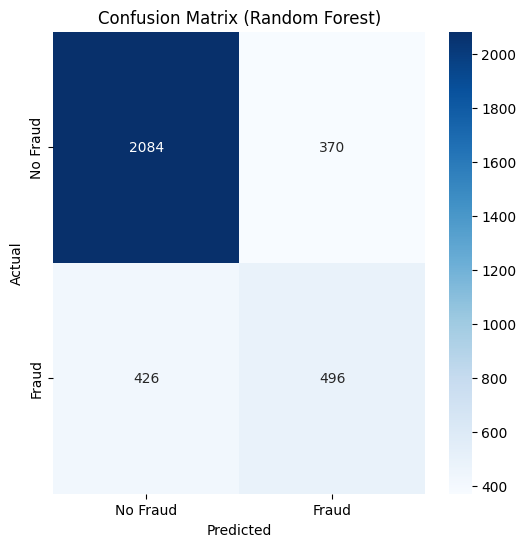


Training XGBoost with NearMiss...
Validation Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2454
           1       0.49      0.65      0.56       922

    accuracy                           0.72      3376
   macro avg       0.67      0.70      0.68      3376
weighted avg       0.75      0.72      0.73      3376



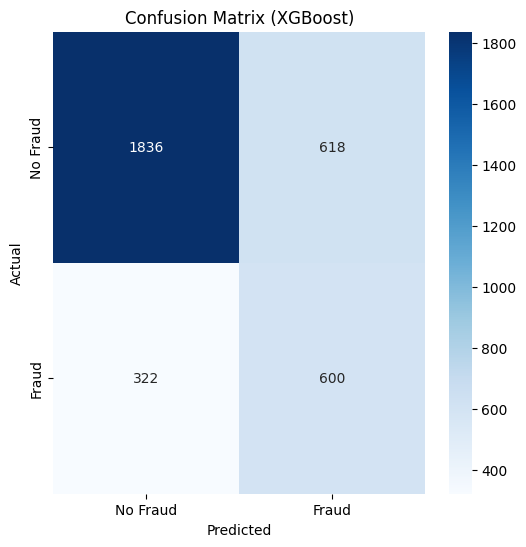


Training AdaBoost with NearMiss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation Performance (AdaBoost):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      2454
           1       0.56      0.51      0.53       922

    accuracy                           0.76      3376
   macro avg       0.69      0.68      0.69      3376
weighted avg       0.75      0.76      0.75      3376



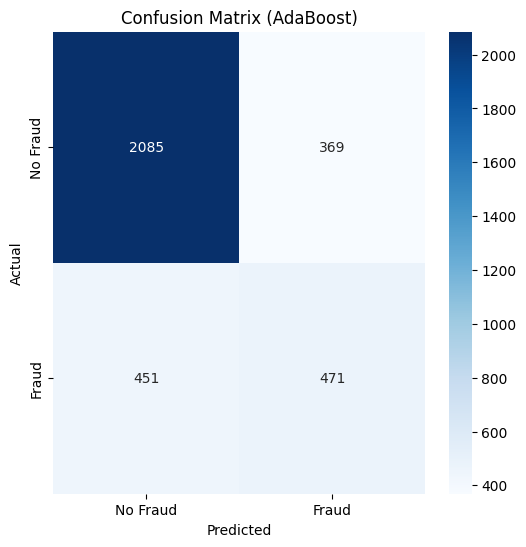


Training Gradient Boosting with NearMiss...
Validation Performance (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2454
           1       0.55      0.51      0.53       922

    accuracy                           0.75      3376
   macro avg       0.69      0.68      0.68      3376
weighted avg       0.75      0.75      0.75      3376



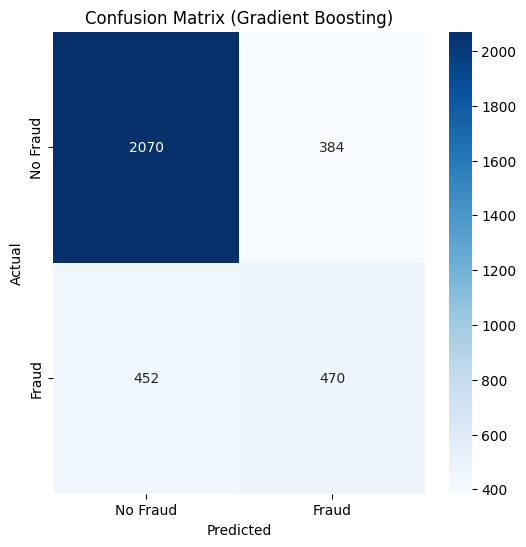


Applying ClusterCentroids...
Original training set size: 10128
ClusterCentroids training set size: 8301

Training Random Forest with ClusterCentroids...
Validation Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2454
           1       0.60      0.46      0.52       922

    accuracy                           0.77      3376
   macro avg       0.71      0.67      0.68      3376
weighted avg       0.75      0.77      0.76      3376



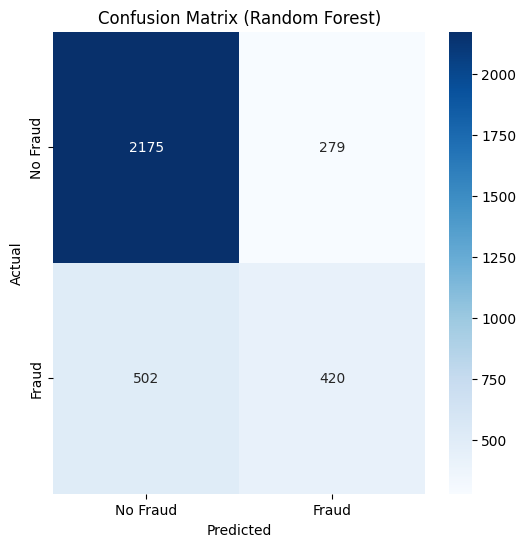


Training XGBoost with ClusterCentroids...
Validation Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      2454
           1       0.47      0.69      0.56       922

    accuracy                           0.70      3376
   macro avg       0.67      0.70      0.67      3376
weighted avg       0.75      0.70      0.72      3376



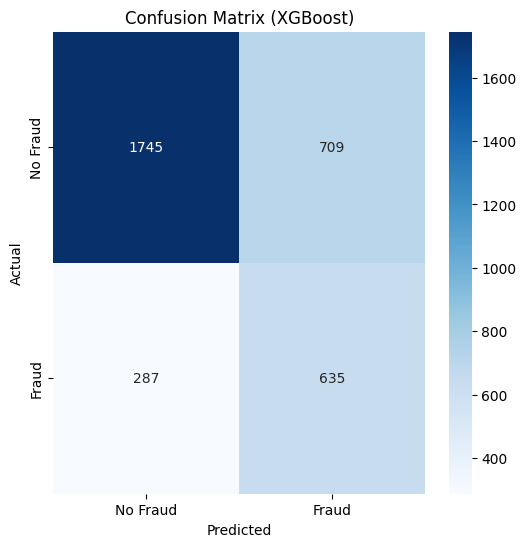


Training AdaBoost with ClusterCentroids...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation Performance (AdaBoost):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2454
           1       0.64      0.45      0.53       922

    accuracy                           0.78      3376
   macro avg       0.73      0.68      0.69      3376
weighted avg       0.77      0.78      0.77      3376



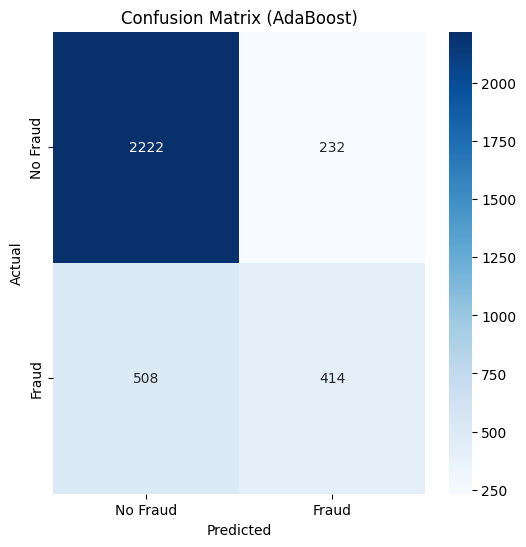


Training Gradient Boosting with ClusterCentroids...
Validation Performance (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2454
           1       0.69      0.42      0.52       922

    accuracy                           0.79      3376
   macro avg       0.75      0.68      0.69      3376
weighted avg       0.78      0.79      0.77      3376



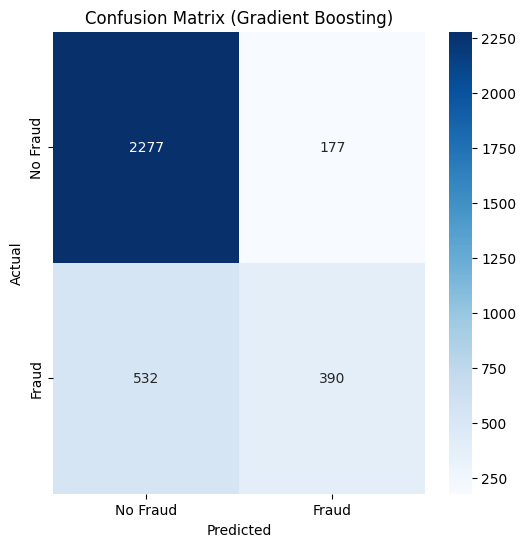

In [58]:
from imblearn.under_sampling import NearMiss, ClusterCentroids

# Define undersampling methods
undersampling_methods = {
    "NearMiss": NearMiss(version=1, n_neighbors=2, sampling_strategy=0.5),
    "ClusterCentroids": ClusterCentroids(random_state=42,sampling_strategy=0.5)
}

results_all = {}

for method_name, undersampler in undersampling_methods.items():
    print(f"\nApplying {method_name}...")

    # Apply undersampling to the training set
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
    print(f"Original training set size: {X_train.shape[0]}")
    print(f"{method_name} training set size: {X_train_resampled.shape[0]}")

    # Train models
    models = {
        "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
        "XGBoost": xgb.XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]), random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    }


    for name, model in models.items():
        print(f"\nTraining {name} with {method_name}...")
        modelm = train_and_evaluate(model, X_train_resampled, y_train_resampled, X_val, y_val, name)

Tampoco funcionaron muy bien estas técnicas por sí solas, por lo tanto, lo que se me ocurre es que se podrían combinar estas técnicas con undersampling aleatorio, de forma que primero se haga como un "filtro" de los datos de la clase dominante más representativos o que no presenten mucho ruido y con base en esos se termina de reduciar hasta que sea proporcional a la clase minoritaria


Applying NearMiss...
Original training set size: 10128
NearMiss training set size: 8301
Original training set size: 10128
Tomek Links training set size: 5534

Training Random Forest with NearMiss...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.67      0.75      2454
           1       0.45      0.72      0.55       922

    accuracy                           0.68      3376
   macro avg       0.66      0.69      0.65      3376
weighted avg       0.75      0.68      0.70      3376



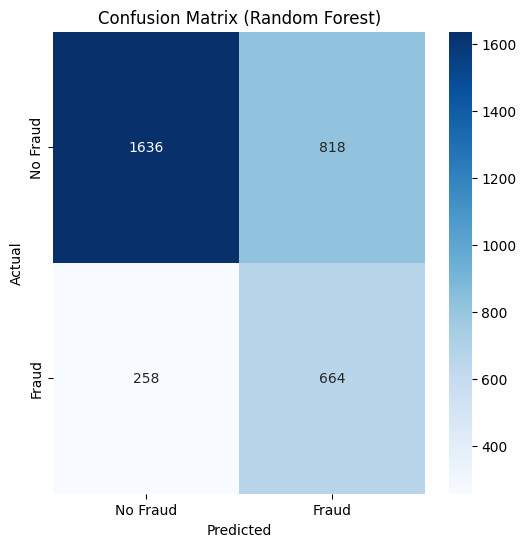


Training XGBoost with NearMiss...
Validation Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      2454
           1       0.42      0.83      0.56       922

    accuracy                           0.64      3376
   macro avg       0.66      0.70      0.63      3376
weighted avg       0.77      0.64      0.66      3376



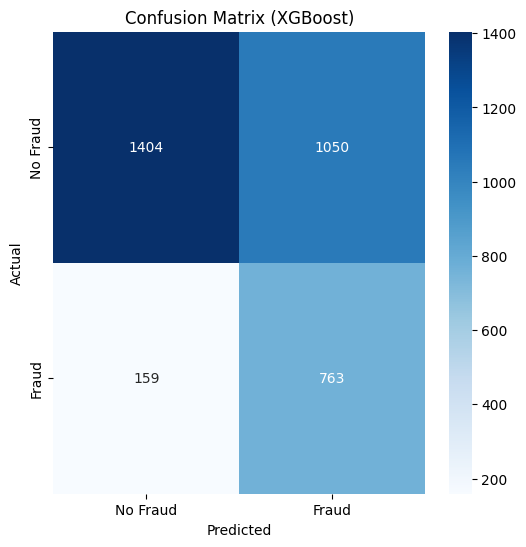


Training AdaBoost with NearMiss...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Validation Performance (AdaBoost):
              precision    recall  f1-score   support

           0       0.85      0.71      0.78      2454
           1       0.47      0.67      0.55       922

    accuracy                           0.70      3376
   macro avg       0.66      0.69      0.66      3376
weighted avg       0.75      0.70      0.72      3376



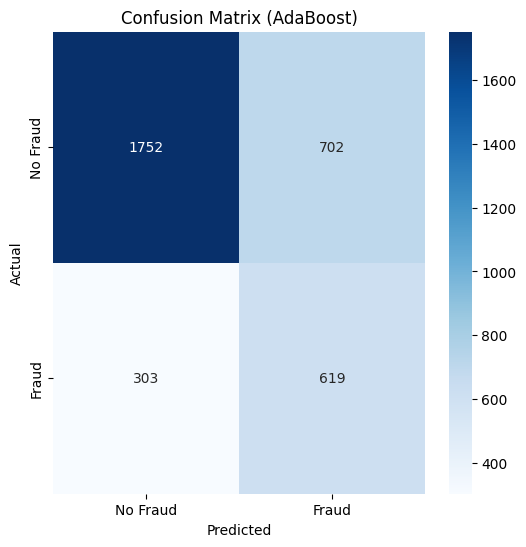


Training Gradient Boosting with NearMiss...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      2454
           1       0.47      0.70      0.56       922

    accuracy                           0.70      3376
   macro avg       0.67      0.70      0.67      3376
weighted avg       0.76      0.70      0.72      3376



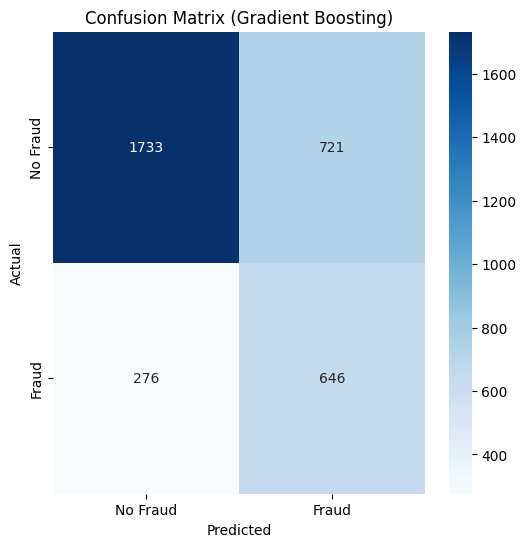


Applying ClusterCentroids...
Original training set size: 10128
ClusterCentroids training set size: 8301
Original training set size: 10128
Tomek Links training set size: 5534

Training Random Forest with ClusterCentroids...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      2454
           1       0.46      0.73      0.56       922

    accuracy                           0.69      3376
   macro avg       0.67      0.70      0.66      3376
weighted avg       0.76      0.69      0.71      3376



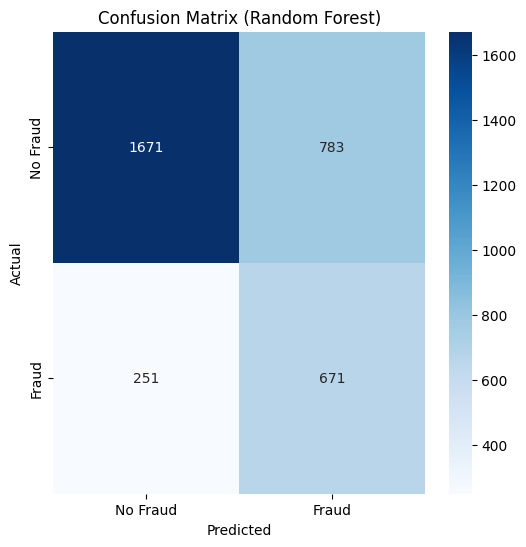


Training XGBoost with ClusterCentroids...
Validation Performance (XGBoost):
              precision    recall  f1-score   support

           0       0.89      0.51      0.65      2454
           1       0.39      0.83      0.53       922

    accuracy                           0.60      3376
   macro avg       0.64      0.67      0.59      3376
weighted avg       0.75      0.60      0.62      3376



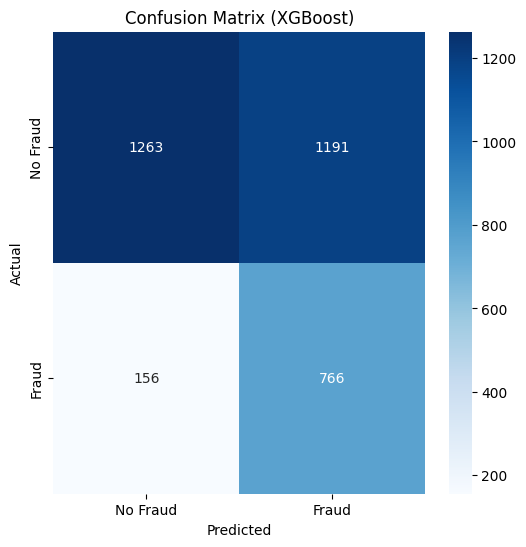


Training AdaBoost with ClusterCentroids...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Validation Performance (AdaBoost):
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      2454
           1       0.48      0.73      0.58       922

    accuracy                           0.71      3376
   macro avg       0.68      0.72      0.68      3376
weighted avg       0.77      0.71      0.72      3376



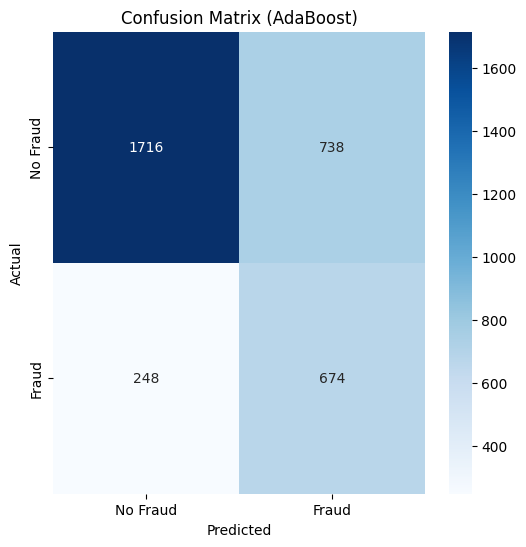


Training Gradient Boosting with ClusterCentroids...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      2454
           1       0.49      0.75      0.59       922

    accuracy                           0.72      3376
   macro avg       0.68      0.73      0.69      3376
weighted avg       0.77      0.72      0.73      3376



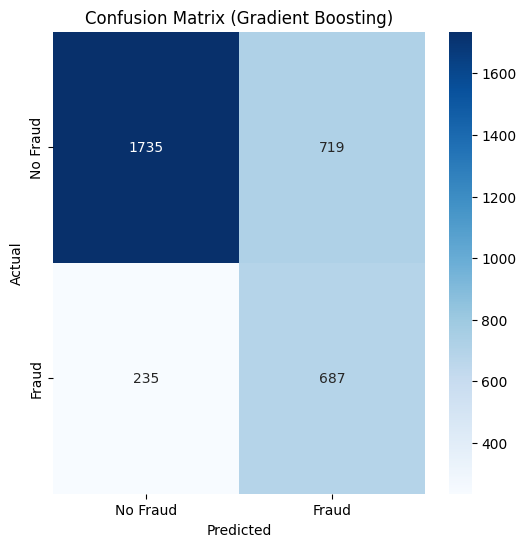

In [59]:
from imblearn.under_sampling import NearMiss, ClusterCentroids

# Define undersampling methods
undersampling_methods = {
    "NearMiss": NearMiss(version=1, n_neighbors=2, sampling_strategy=0.5),
    "ClusterCentroids": ClusterCentroids(random_state=42,sampling_strategy=0.5)
}

results_all = {}

for method_name, undersampler in undersampling_methods.items():
    print(f"\nApplying {method_name}...")

    # Apply undersampling to the training set
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
    print(f"Original training set size: {X_train.shape[0]}")
    print(f"{method_name} training set size: {X_train_resampled.shape[0]}")

    # Separate the majority and minority class data in the training set
    X_majority = X_train_resampled[y_train_resampled == 0]
    X_minority = X_train_resampled[y_train_resampled == 1]
    y_majority = y_train_resampled[y_train_resampled == 0]
    y_minority = y_train_resampled[y_train_resampled == 1]


    # Downsample the majority class to match the size of the minority class
    X_majority_undersampled, y_majority_undersampled = resample(X_majority, y_majority,
                                                              replace=False,  # Don't replace, random sampling
                                                              n_samples=len(y_minority),  # Match the size of minority class
                                                              random_state=42)  # For reproducibility

    # Combine the undersampled majority class with the minority class
    X_train_undersampled = np.vstack((X_majority_undersampled, X_minority))
    y_train_undersampled = np.hstack((y_majority_undersampled, y_minority))


    print("Original training set size:", X_train.shape[0])
    print("Tomek Links training set size:", X_train_undersampled.shape[0])

    # Train models
    models = {
        "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
        "XGBoost": xgb.XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]), random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    }


    for name, model in models.items():
        print(f"\nTraining {name} with {method_name}...")
        modelm = train_and_evaluate(model, X_train_undersampled, y_train_undersampled, X_val, y_val, name)

También hacemos lo mismo de combinar TomekLinks con undersampling aleatorio, pues vemos que hay una mejoría en la matriz de confusión

Original training set size: 9461
Tomek Links training set size: 5534


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Random Forest - tomek+und):
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2454
           1       0.51      0.75      0.61       922

    accuracy                           0.73      3376
   macro avg       0.70      0.74      0.70      3376
weighted avg       0.78      0.73      0.74      3376



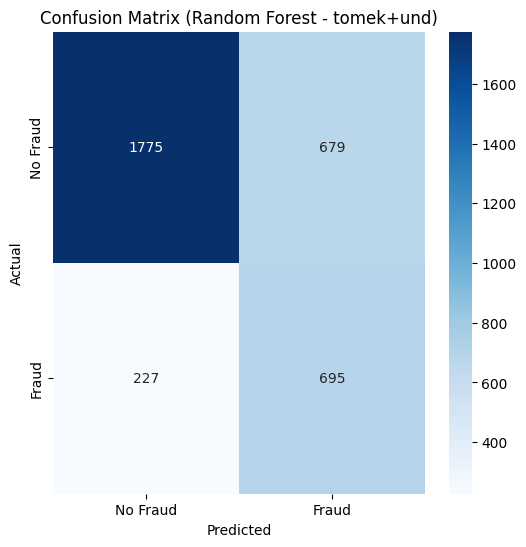

Validation Performance (XGBoost - tomek+und):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2454
           1       0.52      0.75      0.61       922

    accuracy                           0.74      3376
   macro avg       0.70      0.74      0.71      3376
weighted avg       0.79      0.74      0.75      3376



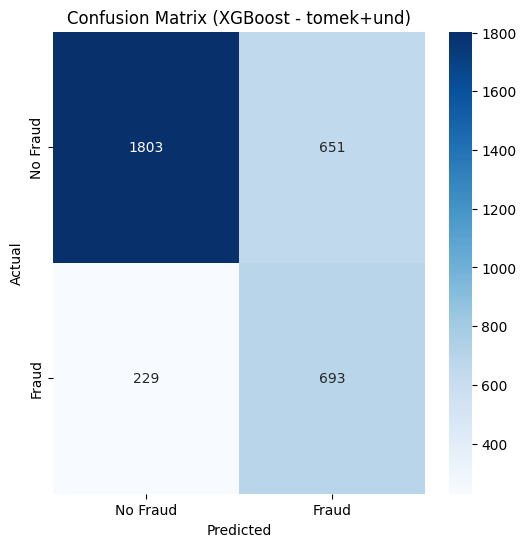

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Validation Performance (AdaBoost- tomek+und):
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2454
           1       0.51      0.73      0.60       922

    accuracy                           0.73      3376
   macro avg       0.69      0.73      0.70      3376
weighted avg       0.78      0.73      0.74      3376



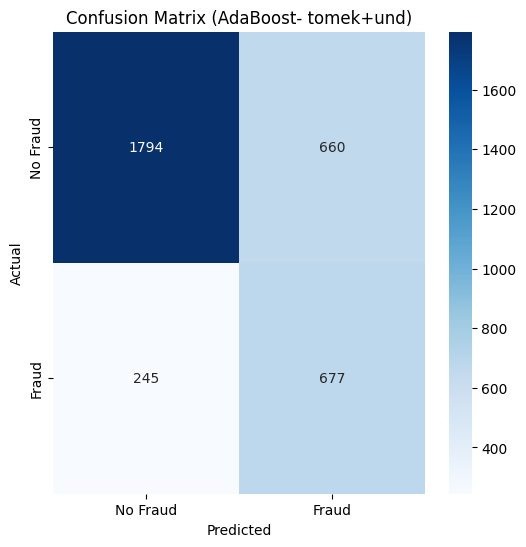

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Gradient Boosting - tomek+und):
              precision    recall  f1-score   support

           0       0.88      0.72      0.80      2454
           1       0.50      0.75      0.60       922

    accuracy                           0.73      3376
   macro avg       0.69      0.74      0.70      3376
weighted avg       0.78      0.73      0.74      3376



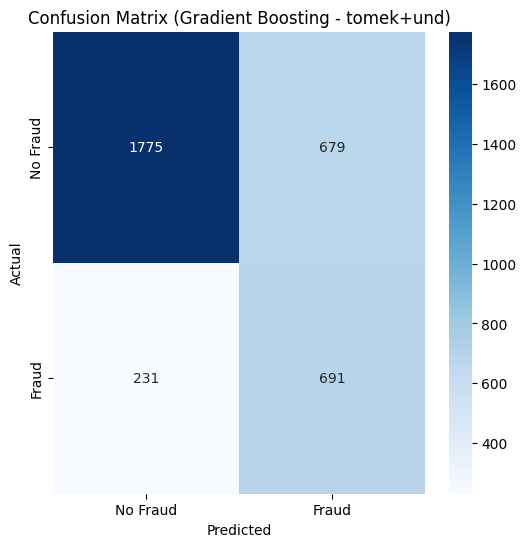

In [60]:
from imblearn.under_sampling import TomekLinks

# Apply Tomek Links undersampling to the training data
tomek = TomekLinks(sampling_strategy='majority')
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Separate the majority and minority class data in the training set
X_majority_tomek = X_train_tomek[y_train_tomek == 0]
X_minority_tomek = X_train_tomek[y_train_tomek == 1]
y_majority_tomek = y_train_tomek[y_train_tomek == 0]
y_minority_tomek = y_train_tomek[y_train_tomek == 1]


# Downsample the majority class to match the size of the minority class
X_majority_undersampled_tomek, y_majority_undersampled_tomek = resample(X_majority_tomek, y_majority_tomek,
                                                           replace=False,  # Don't replace, random sampling
                                                           n_samples=len(y_minority_tomek),  # Match the size of minority class
                                                           random_state=42)  # For reproducibility

# Combine the undersampled majority class with the minority class
X_train_undersampled_tomek = np.vstack((X_majority_undersampled_tomek, X_minority_tomek))
y_train_undersampled_tomek = np.hstack((y_majority_undersampled_tomek, y_minority_tomek))


print("Original training set size:", X_train_tomek.shape[0])
print("Tomek Links training set size:", X_train_undersampled_tomek.shape[0])

# Re-train models on the Tomek Links-processed data
models = {
    "Random Forest - tomek+und": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost - tomek+und": xgb.XGBClassifier(eta=0.1,scale_pos_weight=len(y_train_undersampled_tomek[y_train_undersampled_tomek == 0]) / len(y_train_undersampled_tomek[y_train_undersampled_tomek == 1]), random_state=42),
    "AdaBoost- tomek+und": AdaBoostClassifier(random_state=42),
    "Gradient Boosting - tomek+und": GradientBoostingClassifier(random_state=42, learning_rate=0.05),
}

# Step 3: Train models and evaluate metrics
for name, model in models.items():
    modelm = train_and_evaluate(model, X_train_undersampled_tomek, y_train_undersampled_tomek, X_val, y_val, name)

Finalmente, lo que vamos a hacer es tomar los modelos que tienen las mejores matrices de confusión de todos los que se han entrenado para hacer **probability calibration**

In [61]:
from sklearn.calibration import CalibratedClassifierCV

def train_and_evaluate_prob_calibration(model, X_train, y_train, X_val, y_val, model_name):
    # Train the model
    model.fit(X_train, y_train)

    calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv="prefit")
    calibrated_model.fit(X_train, y_train)

    # Validation evaluation
    val_pred = calibrated_model.predict(X_val)
    val_pred_probs = calibrated_model.predict_proba(X_val)[:, 1]  # Predicted probabilities for class 1 (fraud)

    print(f"Validation Performance ({model_name}):")
    print(classification_report(y_val, val_pred))

    # Confusion matrix
    cm = confusion_matrix(y_val, val_pred)
    plot_confusion_matrix(cm, classes=['No Fraud', 'Fraud'], title=f'Confusion Matrix ({model_name})')

    # Probability distribution histogram
    #plot_probability_distribution(y_val, val_pred_probs, model_name)

    return model


Validation Performance (XGBoost + und + isotonic):
              precision    recall  f1-score   support

           0       0.89      0.64      0.74      2454
           1       0.45      0.79      0.57       922

    accuracy                           0.68      3376
   macro avg       0.67      0.71      0.66      3376
weighted avg       0.77      0.68      0.70      3376



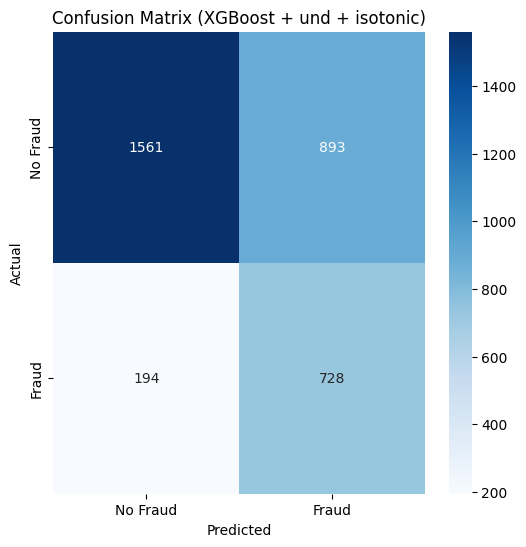

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Gradient Boosting + cc + und + isotonic):
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      2454
           1       0.49      0.74      0.59       922

    accuracy                           0.72      3376
   macro avg       0.68      0.73      0.69      3376
weighted avg       0.77      0.72      0.73      3376



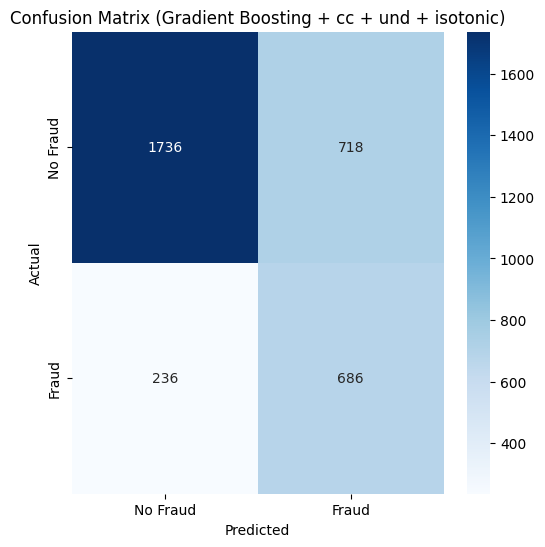

Validation Performance (XGBoost + tomek + und + isotonic):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2454
           1       0.51      0.76      0.61       922

    accuracy                           0.74      3376
   macro avg       0.70      0.74      0.71      3376
weighted avg       0.79      0.74      0.75      3376



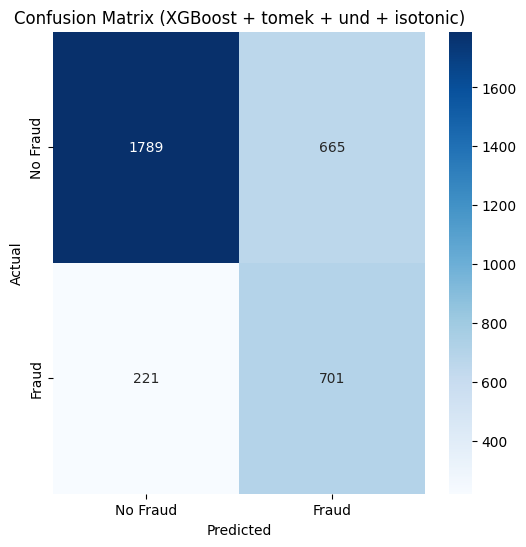

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Validation Performance (Random Forest + tomek + und + isotonic):
              precision    recall  f1-score   support

           0       0.89      0.70      0.79      2454
           1       0.49      0.77      0.60       922

    accuracy                           0.72      3376
   macro avg       0.69      0.74      0.70      3376
weighted avg       0.78      0.72      0.74      3376



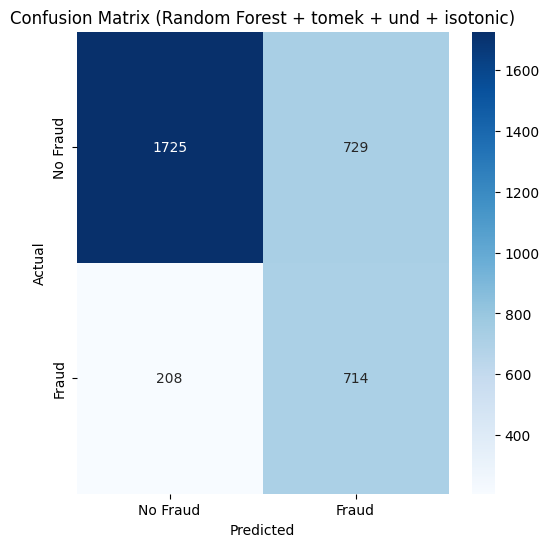

In [62]:
#undersampling aleatorio con XGBoost
  # Calculate scale_pos_weight for XGBoost
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

  # XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, eta=0.05)
xgb_model = train_and_evaluate_prob_calibration(xgb_model, X_train_undersampled, y_train_undersampled, X_val, y_val, 'XGBoost + und + isotonic')

#ClusterCentroids + aleatorio + Gradient Boosting

cc_undersampler = ClusterCentroids(random_state=42,sampling_strategy=0.5)


# Apply undersampling to the training set
X_train_resampled_cc, y_train_resampled_cc = cc_undersampler.fit_resample(X_train, y_train)

    # Separate the majority and minority class data in the training set
X_majority_cc = X_train_resampled_cc[y_train_resampled_cc == 0]
X_minority_cc = X_train_resampled_cc[y_train_resampled == 1]
y_majority_cc = y_train_resampled_cc[y_train_resampled_cc == 0]
y_minority_cc = y_train_resampled_cc[y_train_resampled_cc == 1]


    # Downsample the majority class to match the size of the minority class
X_majority_undersampled_cc, y_majority_undersampled_cc = resample(X_majority_cc, y_majority_cc,
                                                              replace=False,  # Don't replace, random sampling
                                                              n_samples=len(y_minority_cc),  # Match the size of minority class
                                                              random_state=42)  # For reproducibility

    # Combine the undersampled majority class with the minority class
X_train_undersampled_cc = np.vstack((X_majority_undersampled_cc, X_minority_cc))
y_train_undersampled_cc = np.hstack((y_majority_undersampled_cc, y_minority_cc))

gradient_model = GradientBoostingClassifier(random_state=42)

gradient_model = train_and_evaluate_prob_calibration(gradient_model, X_train_undersampled_cc, y_train_undersampled_cc, X_val, y_val, 'Gradient Boosting + cc + und + isotonic')

#TomekLinks + aleatorio + XGBoost

xgb_tomek = xgb.XGBClassifier(eta=0.1,scale_pos_weight=len(y_train_undersampled_tomek[y_train_undersampled_tomek == 0]) / len(y_train_undersampled_tomek[y_train_undersampled_tomek == 1]), random_state=42)
xgb_tomek = train_and_evaluate_prob_calibration(xgb_tomek, X_train_undersampled_tomek, y_train_undersampled_tomek, X_val, y_val, 'XGBoost + tomek + und + isotonic')

#TomekLinks + aleatorio + RandomForest

rf_tomek = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_tomek = train_and_evaluate_prob_calibration(rf_tomek, X_train_undersampled_tomek, y_train_undersampled_tomek, X_val, y_val, 'Random Forest + tomek + und + isotonic')

Observamos que la matriz con menor cantidad de falsos negativos es la de XGBoost entrenado usando Tomek y undersampling aleatorio, por lo que vamos a usar la data de test y ver los resultados

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Test Performance (Gradient Boosting - tomek+und):
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      2454
           1       0.50      0.74      0.59       922

    accuracy                           0.73      3376
   macro avg       0.69      0.73      0.69      3376
weighted avg       0.78      0.73      0.74      3376



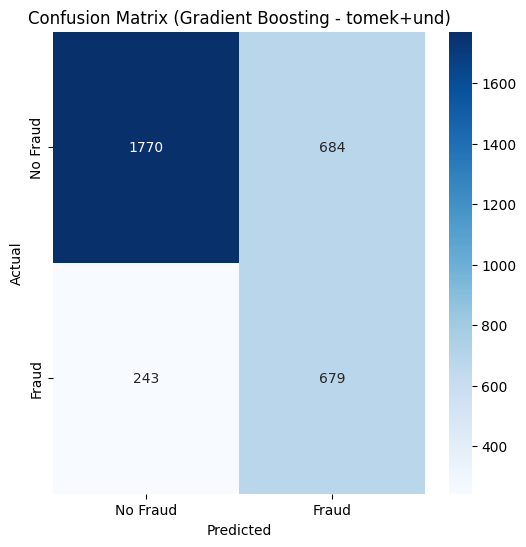

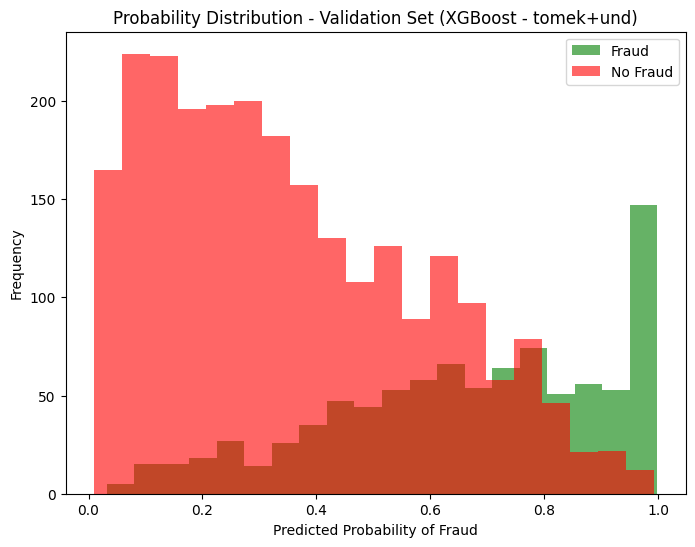

In [66]:

    # Validation evaluation
test_pred = xgb_tomek.predict(X_test)
test_pred_probs = xgb_tomek.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1 (fraud)

    # # Test evaluation
test_pred = model.predict(X_test)
print("Test Performance (Gradient Boosting - tomek+und):")
print(classification_report(y_test, test_pred))


# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
plot_confusion_matrix(cm, classes=['No Fraud', 'Fraud'], title='Confusion Matrix (Gradient Boosting - tomek+und)')

    # Probability distribution histogram
plot_probability_distribution(y_test, test_pred_probs, 'XGBoost - tomek+und')


Con lo cual vemos que el modelo ha logrado generalizar y por lo tanto lo elegimos para desplegarlo.

In [64]:
joblib.dump(xgb_tomek, 'trained_model.pkl')

['trained_model.pkl']

Aquí solo quería intentar cómo podía usar Support Vector Machine para este problema de clasificación, y la verdad es que la matriz de confusión no está tan mal, incluso usando únicamente la data sin balancear

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.87      0.77      0.81      2454
           1       0.53      0.69      0.60       922

    accuracy                           0.75      3376
   macro avg       0.70      0.73      0.71      3376
weighted avg       0.78      0.75      0.76      3376



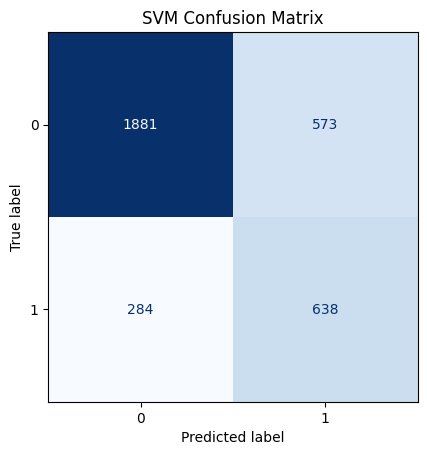

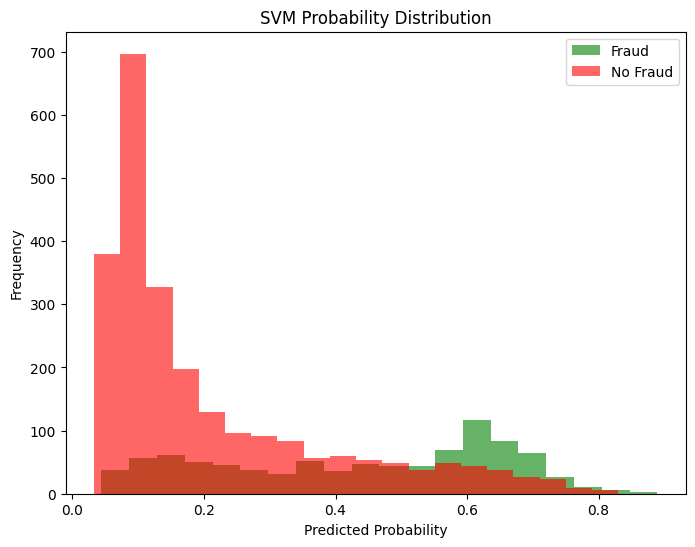

In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Scaling and SVM pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, class_weight='balanced', random_state=42))
])

# Train the SVM
svm_pipeline.fit(X_train, y_train)

# Predict
y_pred = svm_pipeline.predict(X_val)
y_pred_probs = svm_pipeline.predict_proba(X_val)[:, 1]

# Metrics
print("Classification Report (SVM):")
print(classification_report(y_val, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_val, y_pred, cmap="Blues", colorbar=False
)
plt.title("SVM Confusion Matrix")
plt.show()

# Probability Distribution Plot
plt.figure(figsize=(8, 6))
fraude = y_pred_probs[y_val == 1]
no_fraude = y_pred_probs[y_val == 0]
plt.hist(fraude, bins=20, alpha=0.6, color='g', label='Fraud')
plt.hist(no_fraude, bins=20, alpha=0.6, color='r', label='No Fraud')
plt.title("SVM Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend(loc='best')
plt.show()
